In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt


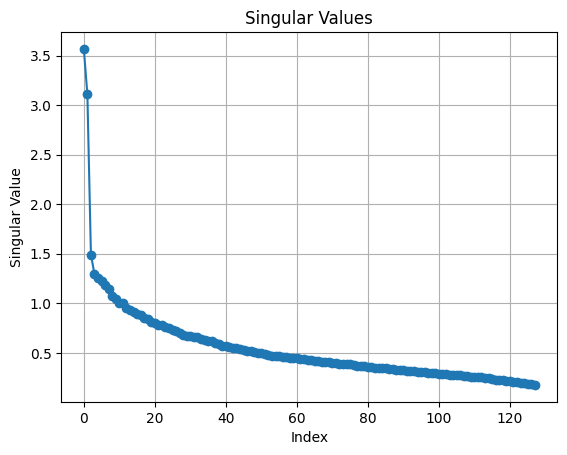

In [4]:
checkpoint = torch.load("./out-shakespeare-char/ckpt2000.pt")
numpy_array = checkpoint['model']['transformer.h.0.attn.c_attn.weight'].cpu().numpy()
u, s, vh = np.linalg.svd(numpy_array)

plt.plot(s, marker='o', linestyle='-')
plt.title("Singular Values")
plt.xlabel("Index")
plt.ylabel("Singular Value")
plt.grid(True)
plt.show()

In [90]:
def smooth(values, window_size):

    """ Glättet eine Liste von Werten mittels eines einfachen gleitenden Durchschnitts. """
    smoothed_values = []
    for i in range(len(values) - window_size + 1):
        window = values[i:i + window_size]
        window_average = sum(window) / window_size
        smoothed_values.append(window_average)
    return smoothed_values

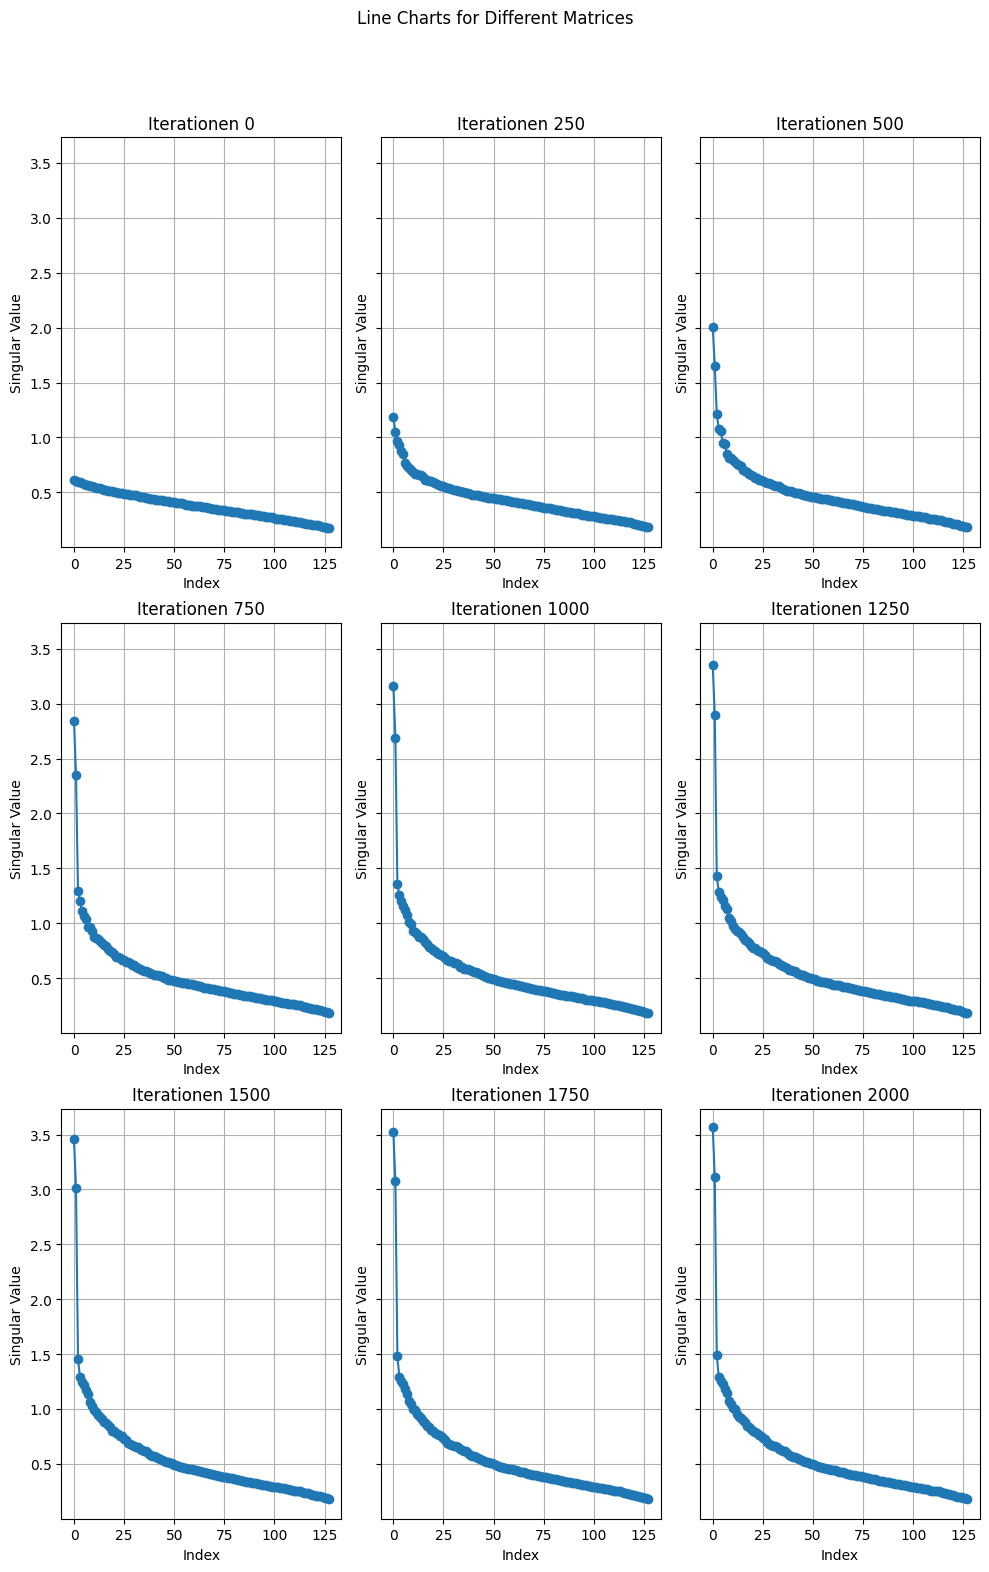

In [18]:
# Number of matrices and singular values
num_matrices = 9

# Create a figure and an array of subplots
fig, axs = plt.subplots(3, 3, figsize=(10, 16), sharey=True)
fig.suptitle("Line Charts for Different Matrices")

# Loop through the subplots and plot line charts for different matrices
for i in range(num_matrices):
    row = i // 3
    col = i % 3
    ax = axs[row, col]
    
    chts = ['ckpt0.pt', 'ckpt250.pt','ckpt500.pt','ckpt750.pt','ckpt1000.pt','ckpt1250.pt','ckpt1500.pt','ckpt1750.pt','ckpt2000.pt']
    checkpoint = torch.load("./out-shakespeare-char/" + chts[i])
    matrix = checkpoint['model']['transformer.h.0.attn.c_attn.weight'].cpu().numpy()

    # Calculate the singular values using SVD
    _, s, _ = np.linalg.svd(matrix)

    # Plot the singular values as a line chart
    ax.plot(s, marker='o', linestyle='-')
    ax.set_title(f"Iterationen {(i)*250}")
    ax.set_xlabel("Index")
    ax.set_ylabel("Singular Value")
    ax.grid(True)

# Adjust layout and spacing
plt.tight_layout()
plt.subplots_adjust(top=0.9)

# Display the subplots
plt.show()


In [97]:

    
# Number of matrices and singular values
def print_svd(matrixname, num):
    num_matrices = num

    # Create a figure and an array of subplots
    fig, axs = plt.subplots(3, 3, figsize=(10, 16), sharey=True)
    fig.suptitle("SVDs of " + matrixname)
    # Loop through the subplots and plot line charts for different matrices
    for i in range(num_matrices):
        row = i // 3
        col = i % 3
        ax = axs[row, col]
        
        chts = ['ckpt0.pt', 'ckpt250.pt','ckpt500.pt','ckpt750.pt','ckpt1000.pt','ckpt1250.pt','ckpt1500.pt','ckpt1750.pt','ckpt2000.pt']
        checkpoint = torch.load("./out-shakespeare-char/" + chts[i])
        matrix = checkpoint['model'][matrixname].cpu().numpy()

        # Calculate the singular values using SVD
        _, s, _ = np.linalg.svd(matrix)

        s = smooth(s, 5)
        x = range(len(s))
        y = s
        kneedle = KneeLocator(x, y, S=0.1, curve="convex", direction="decreasing")


        # Plot the singular values as a line chart
        ax.plot(s, marker='o', linestyle='-')
        ax.set_title(f"Iterationen {(i)*250}")
        ax.set_xlabel("Index")
        ax.set_ylabel("Singular Value")
        ax.vlines(kneedle.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
        ax.grid(True)

    # Adjust layout and spacing
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)

    # Display the subplots
    plt.show()

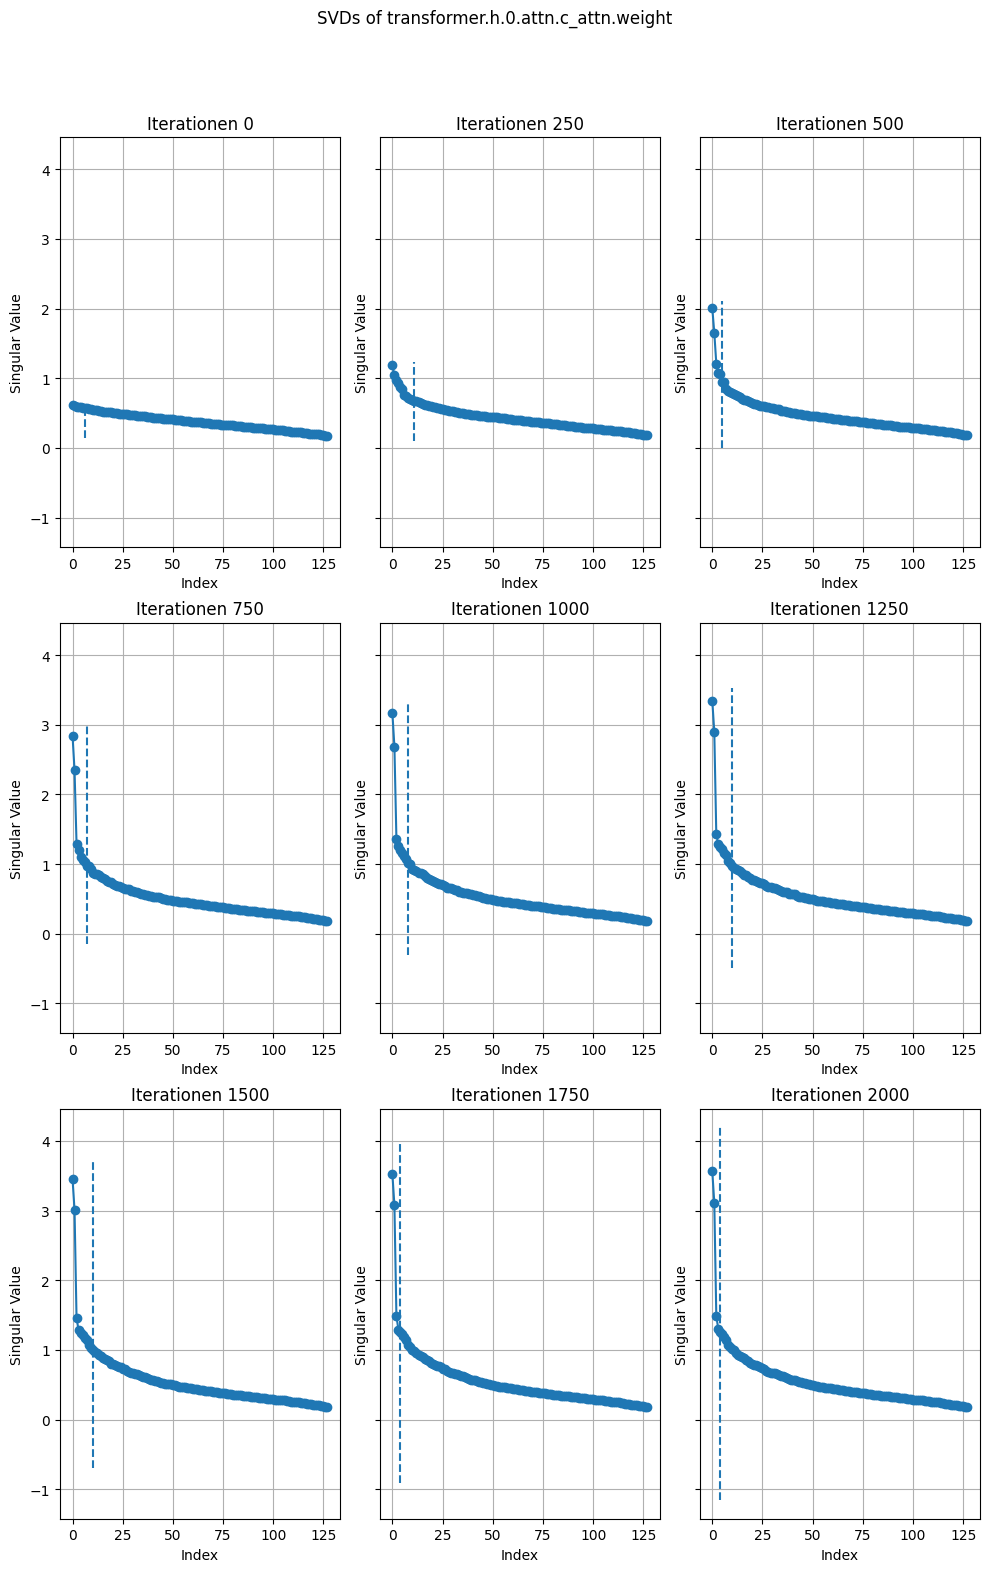

In [95]:
print_svd('transformer.h.0.attn.c_attn.weight', 9)

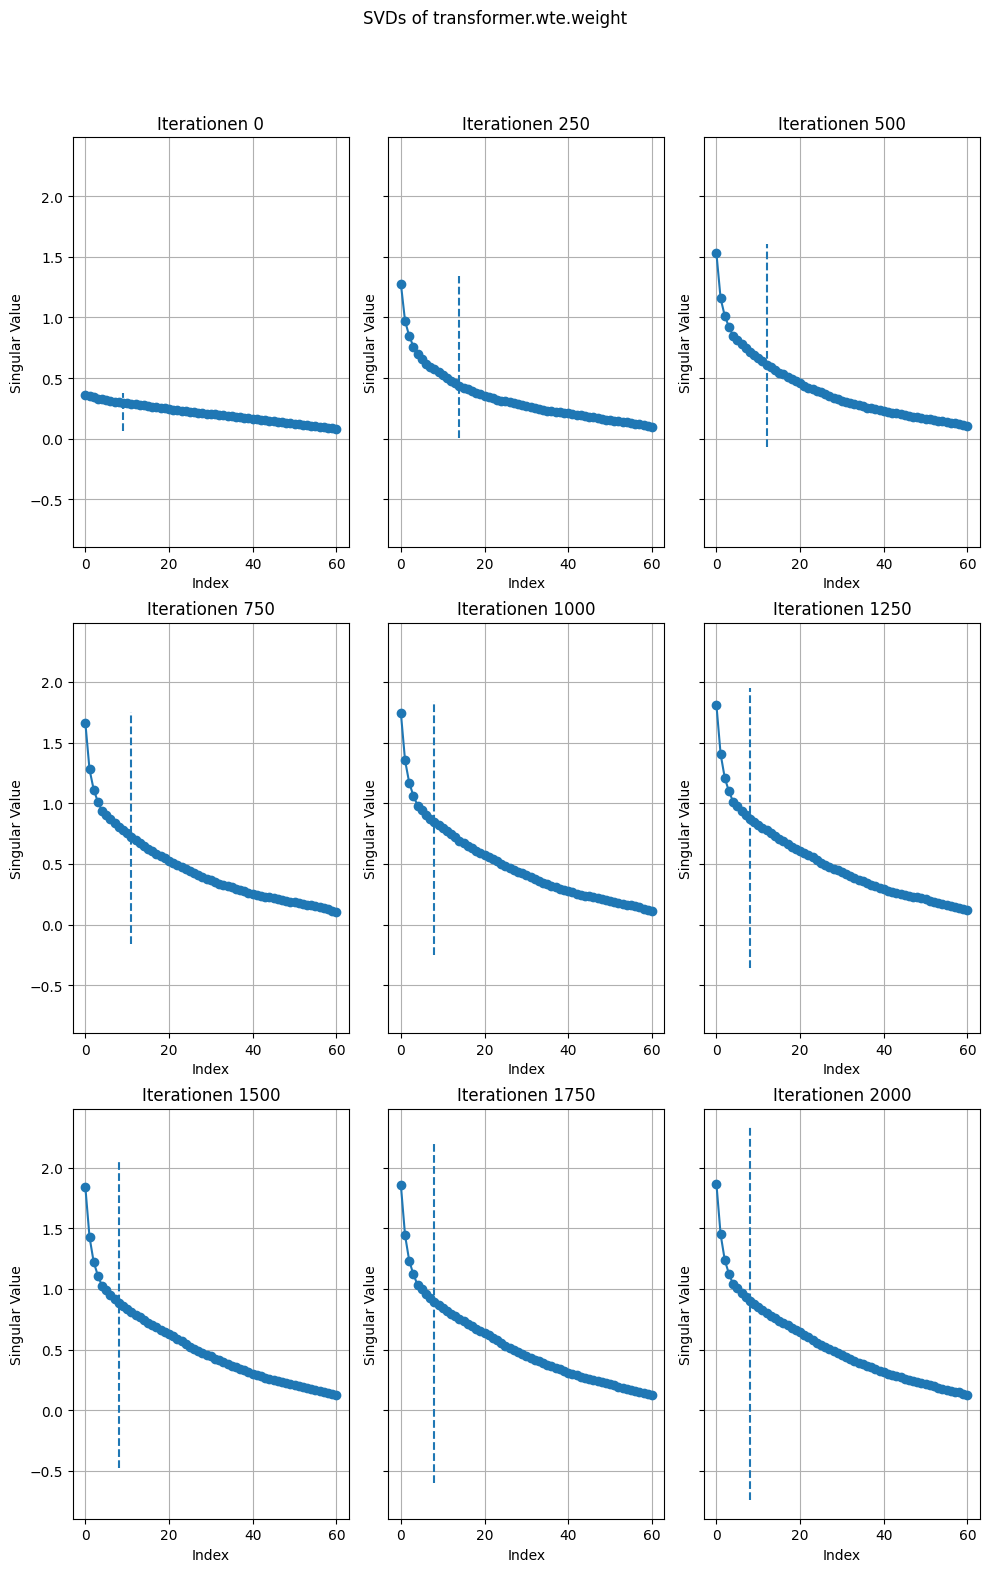

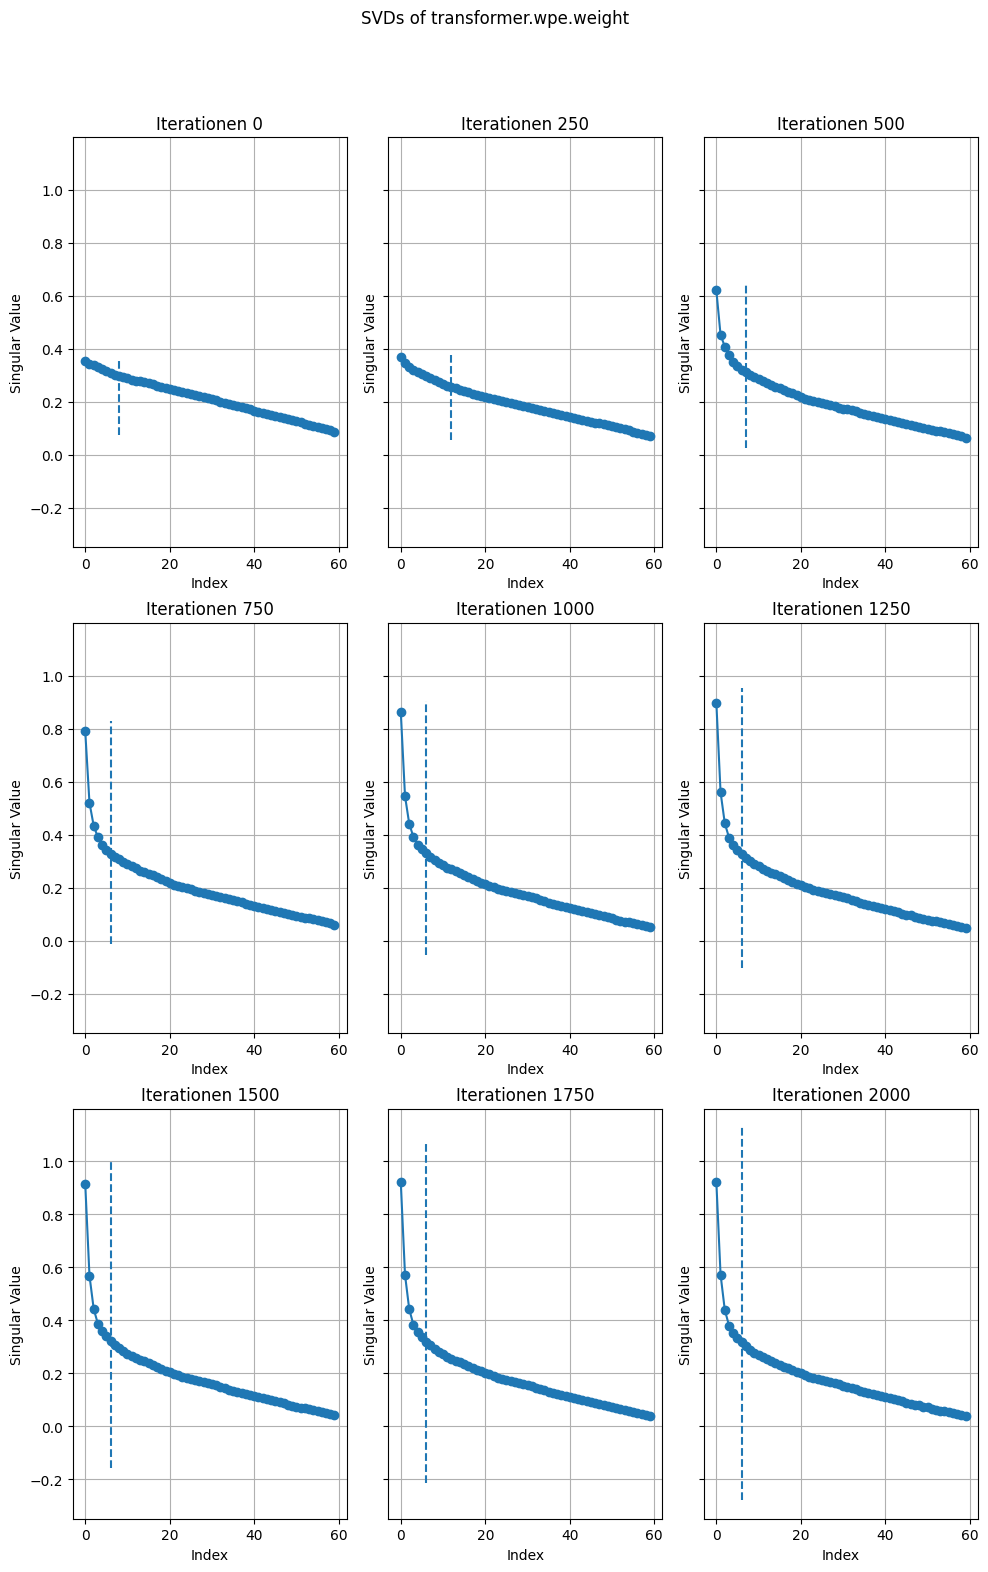

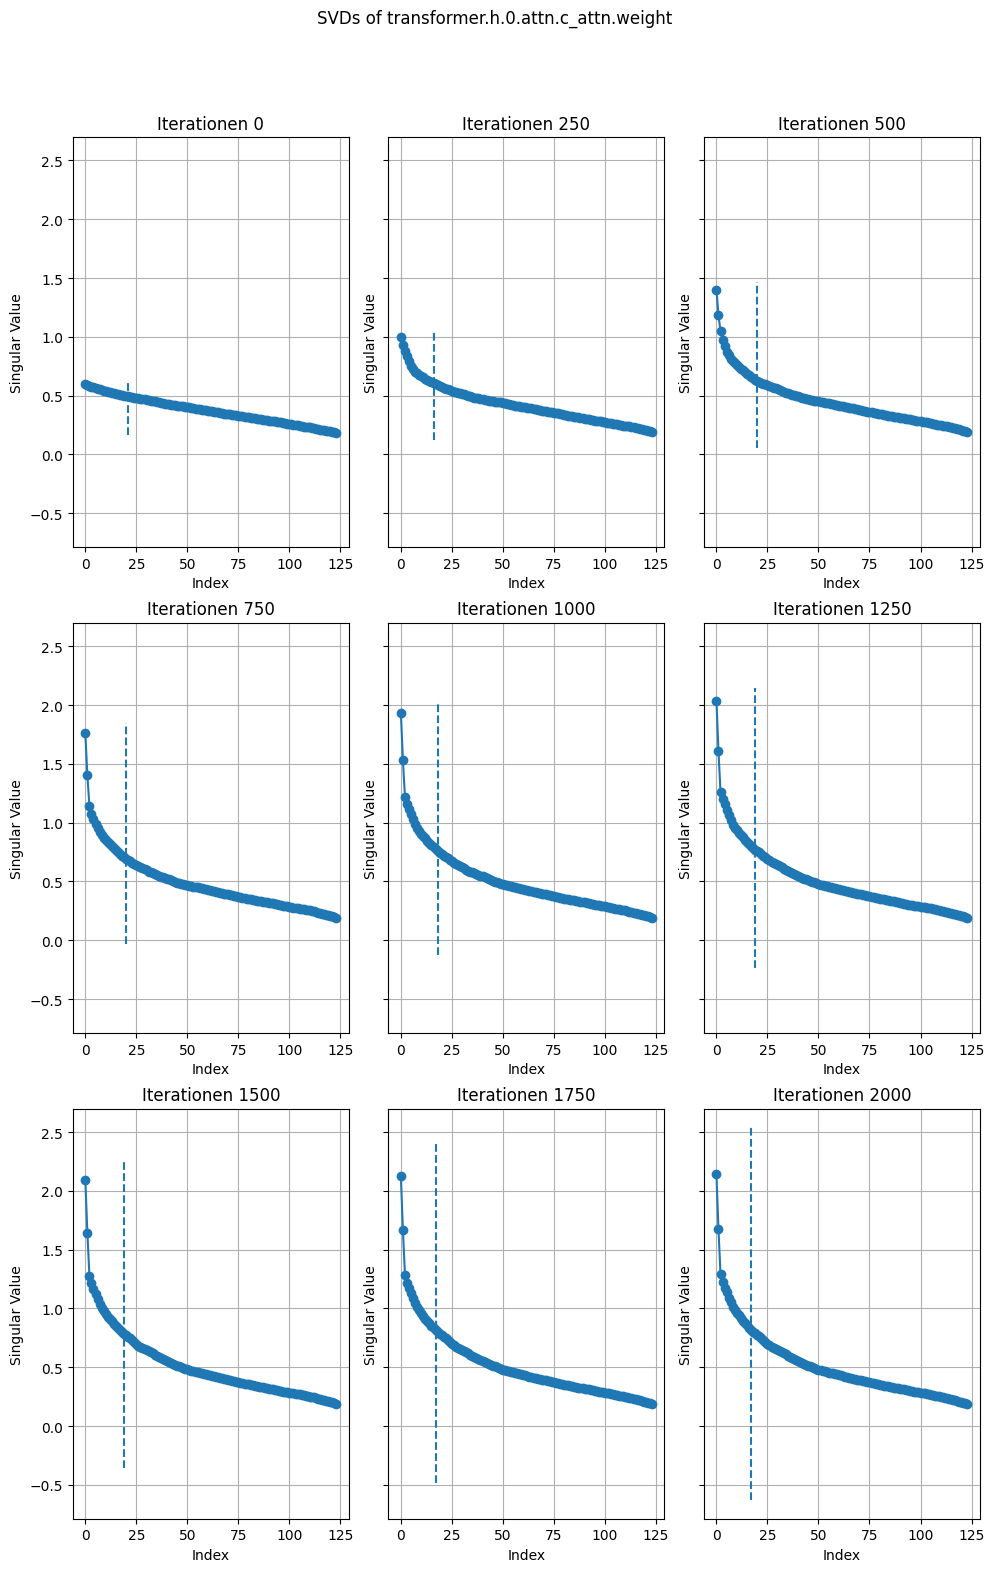

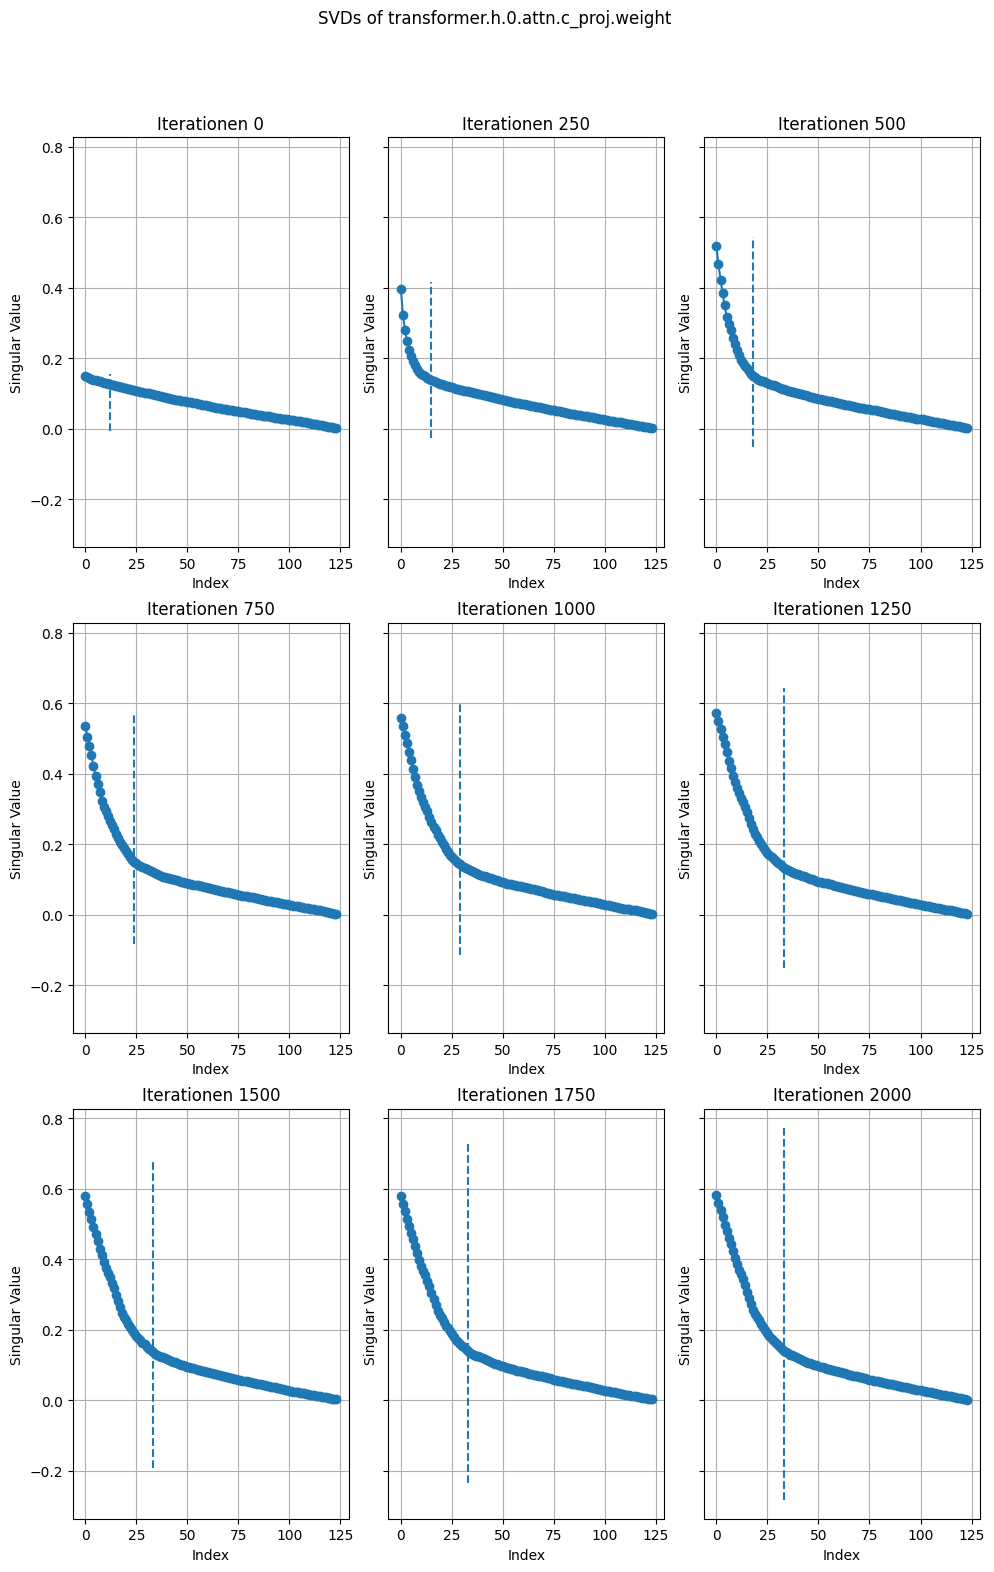

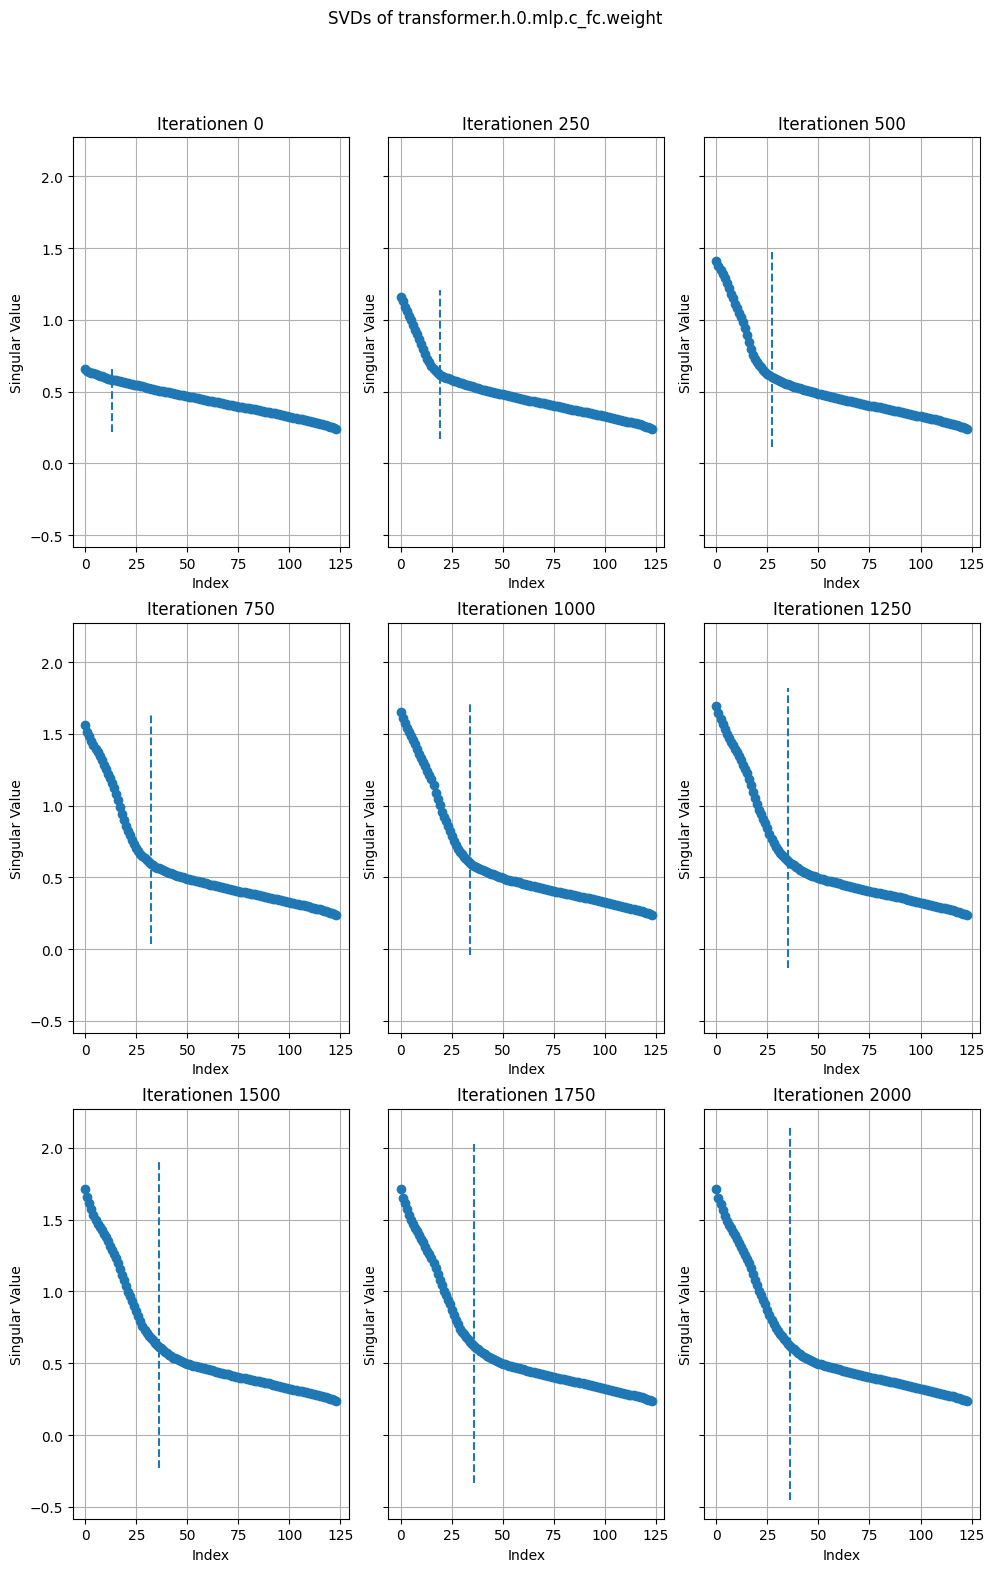

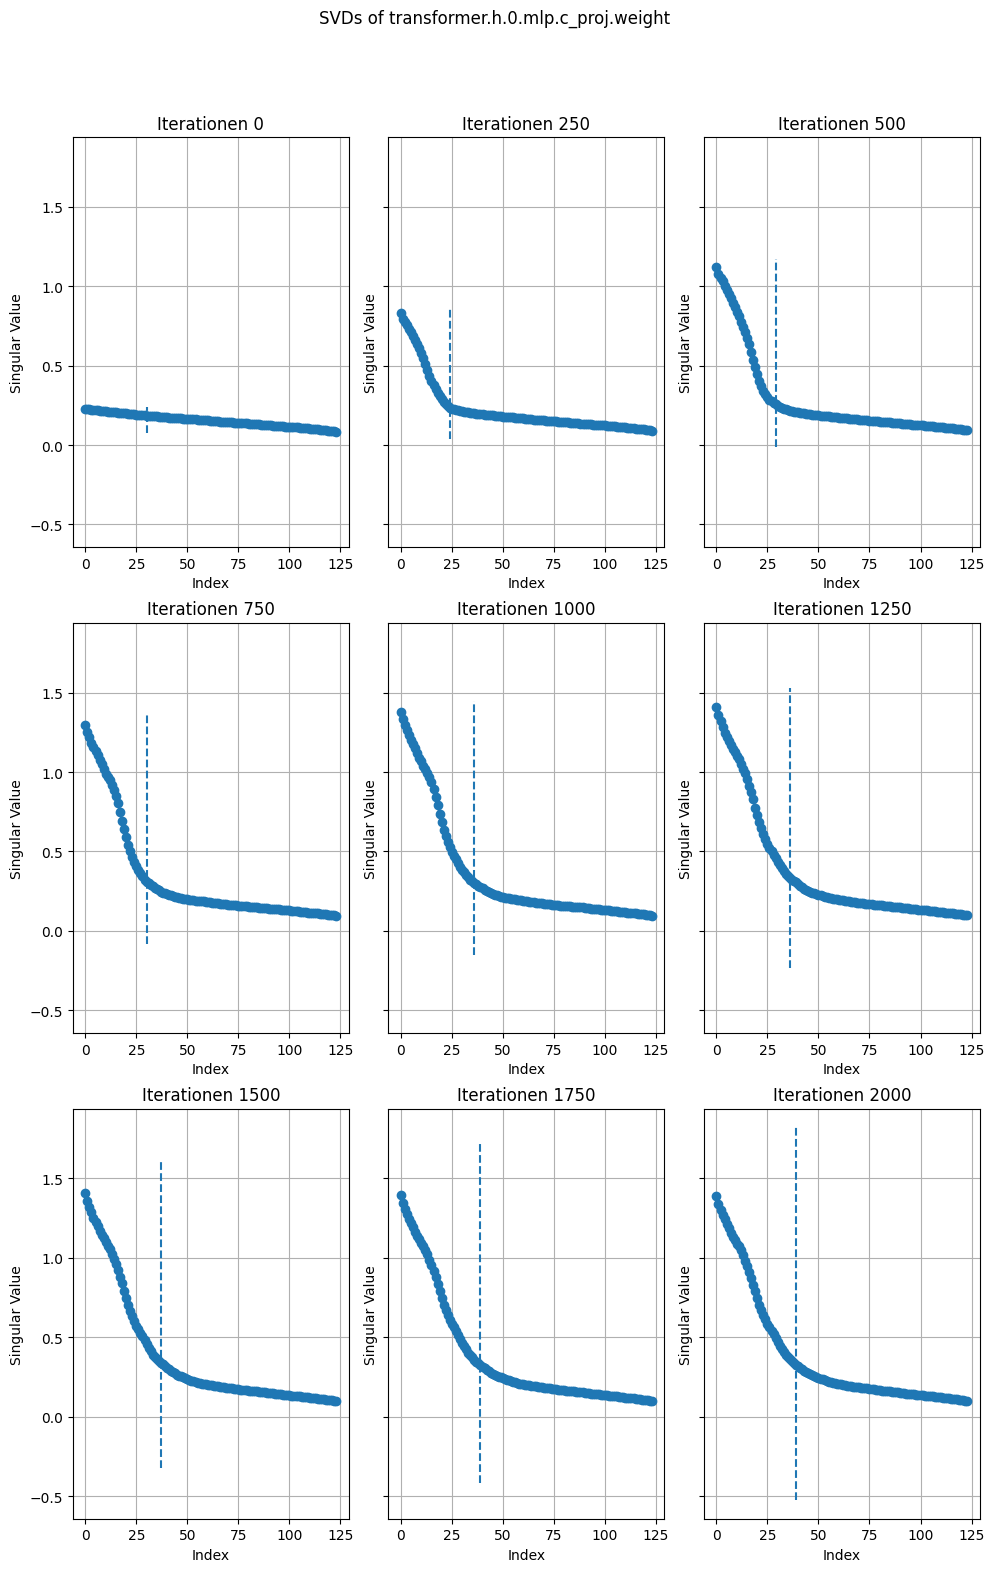

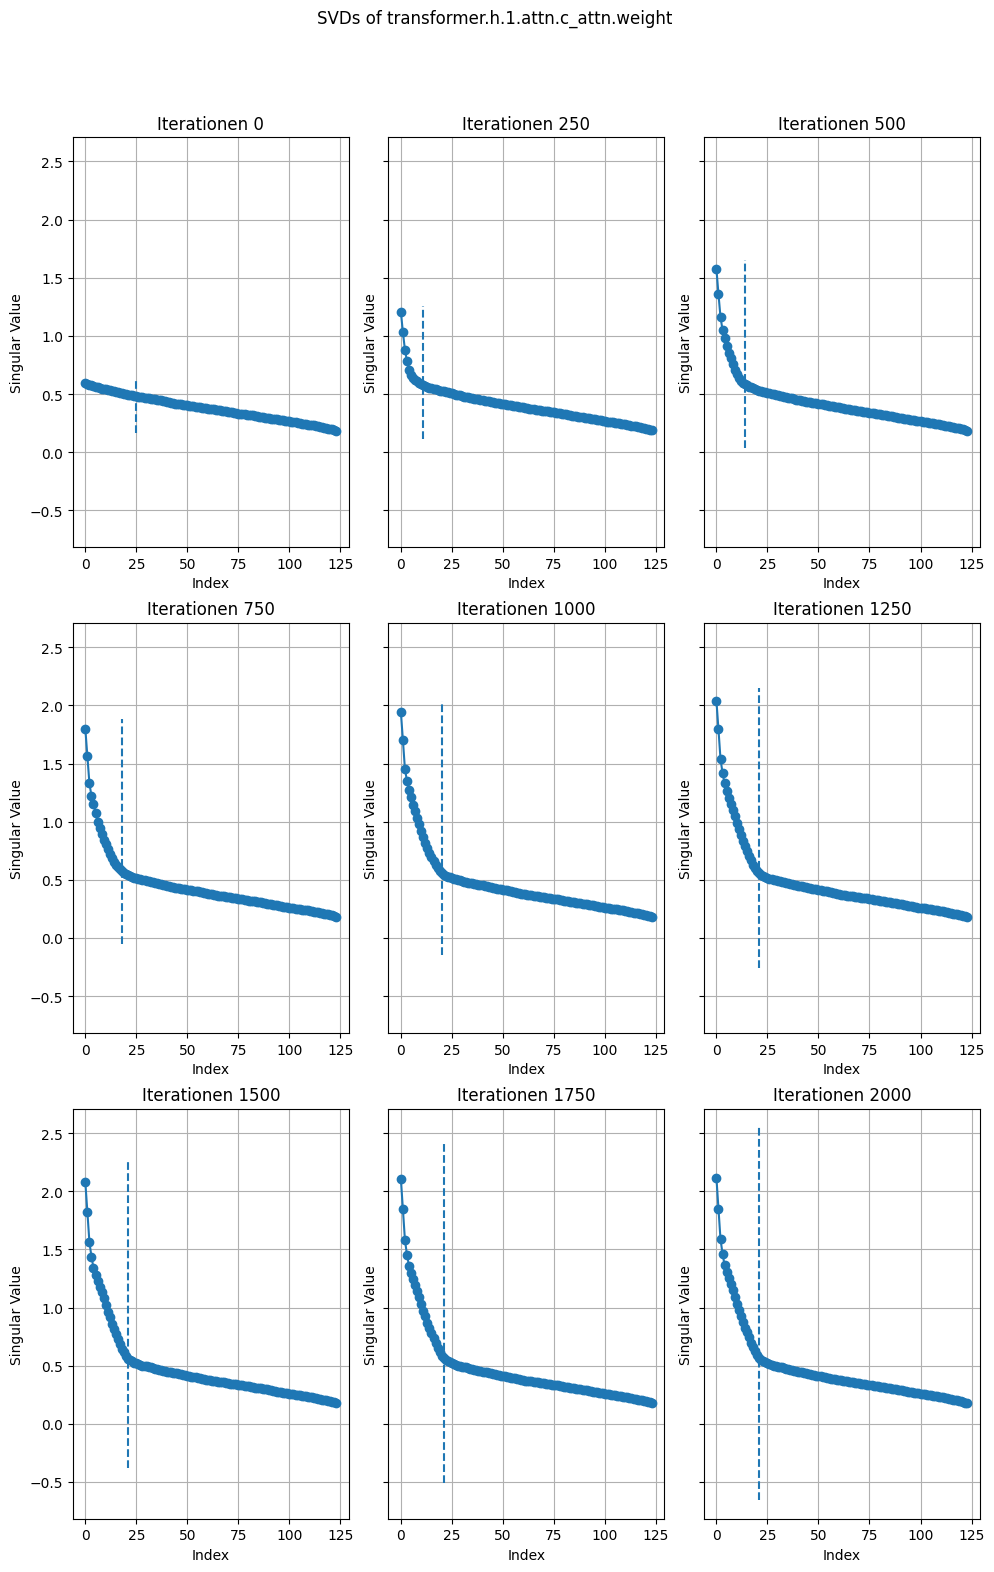

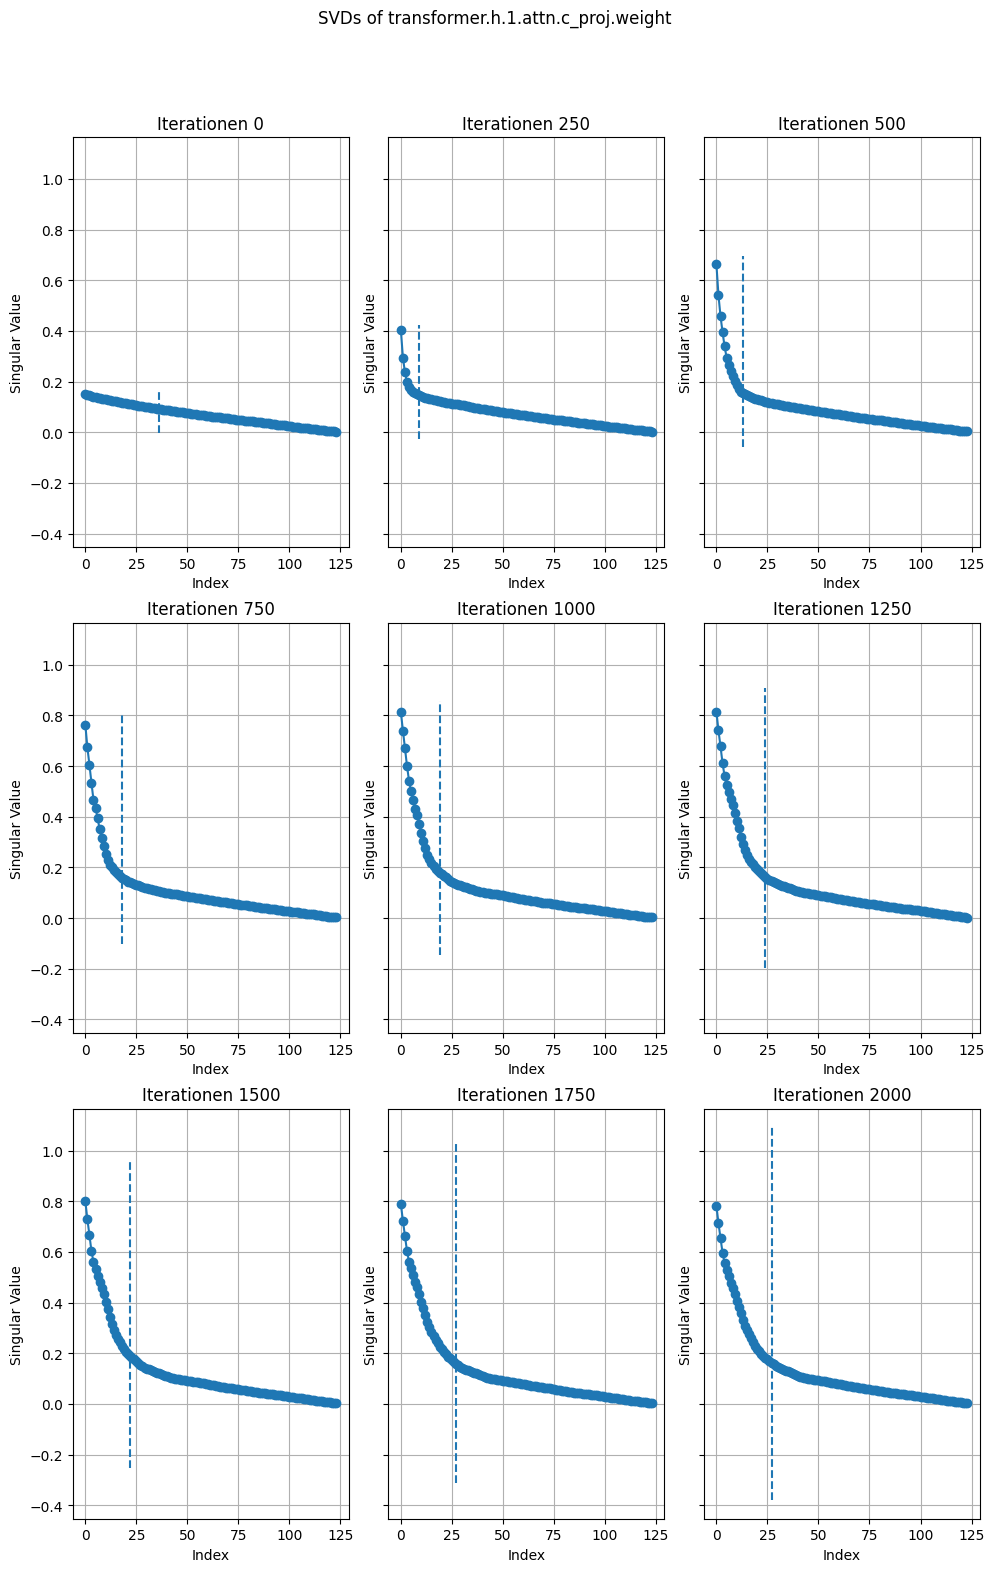

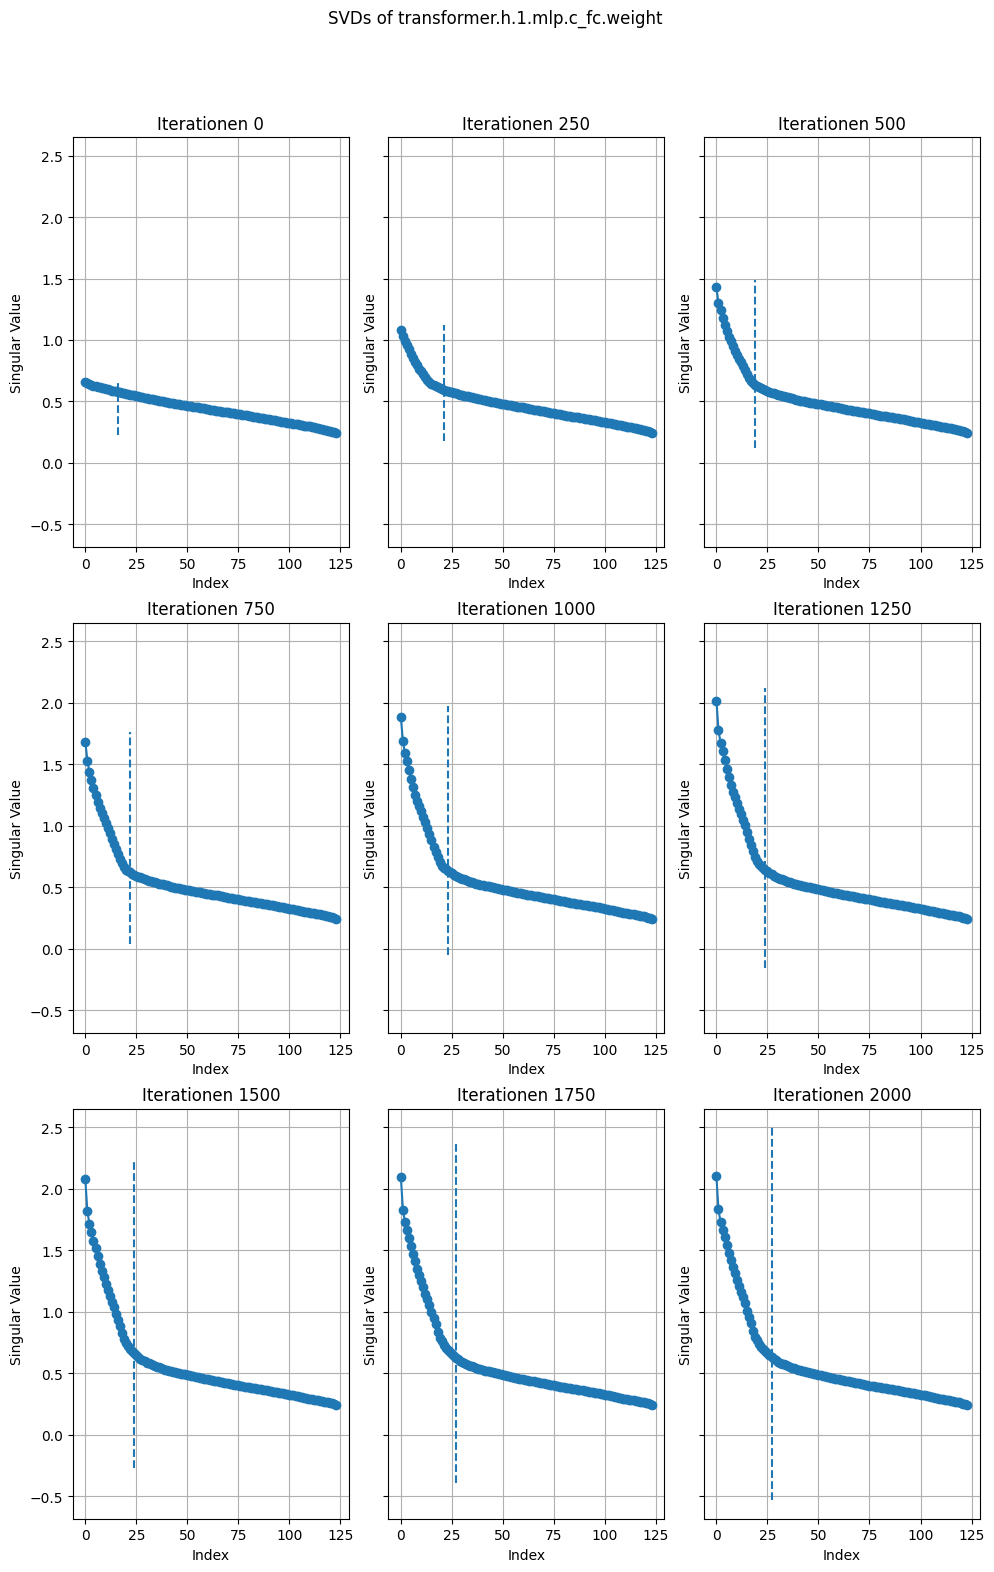

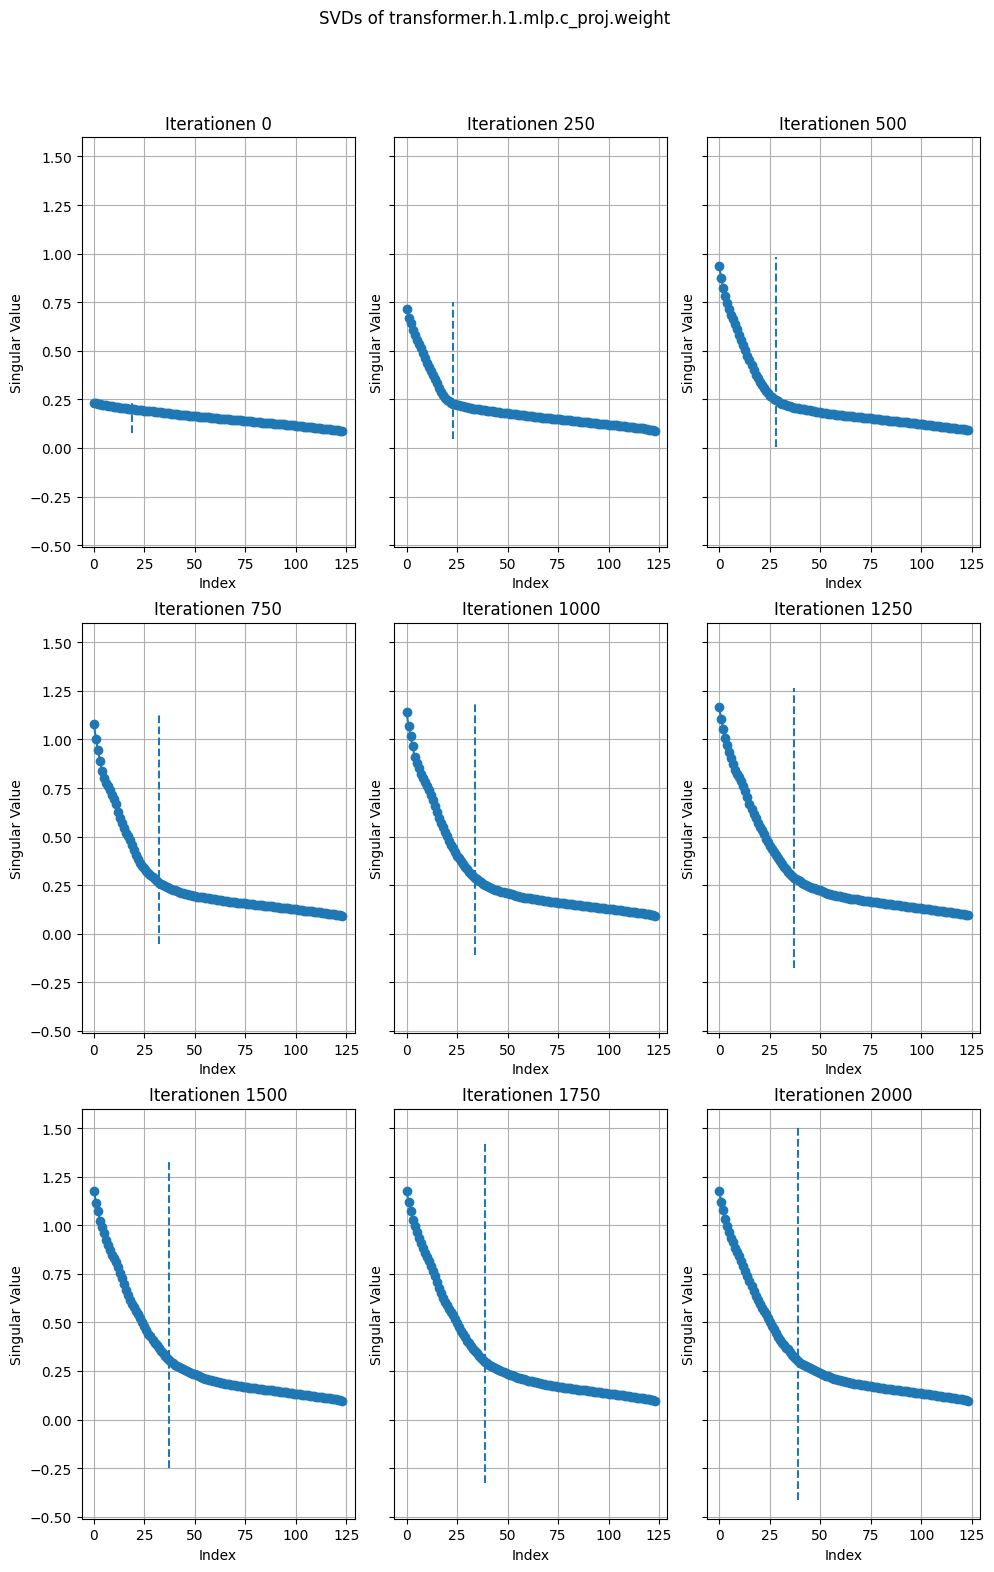

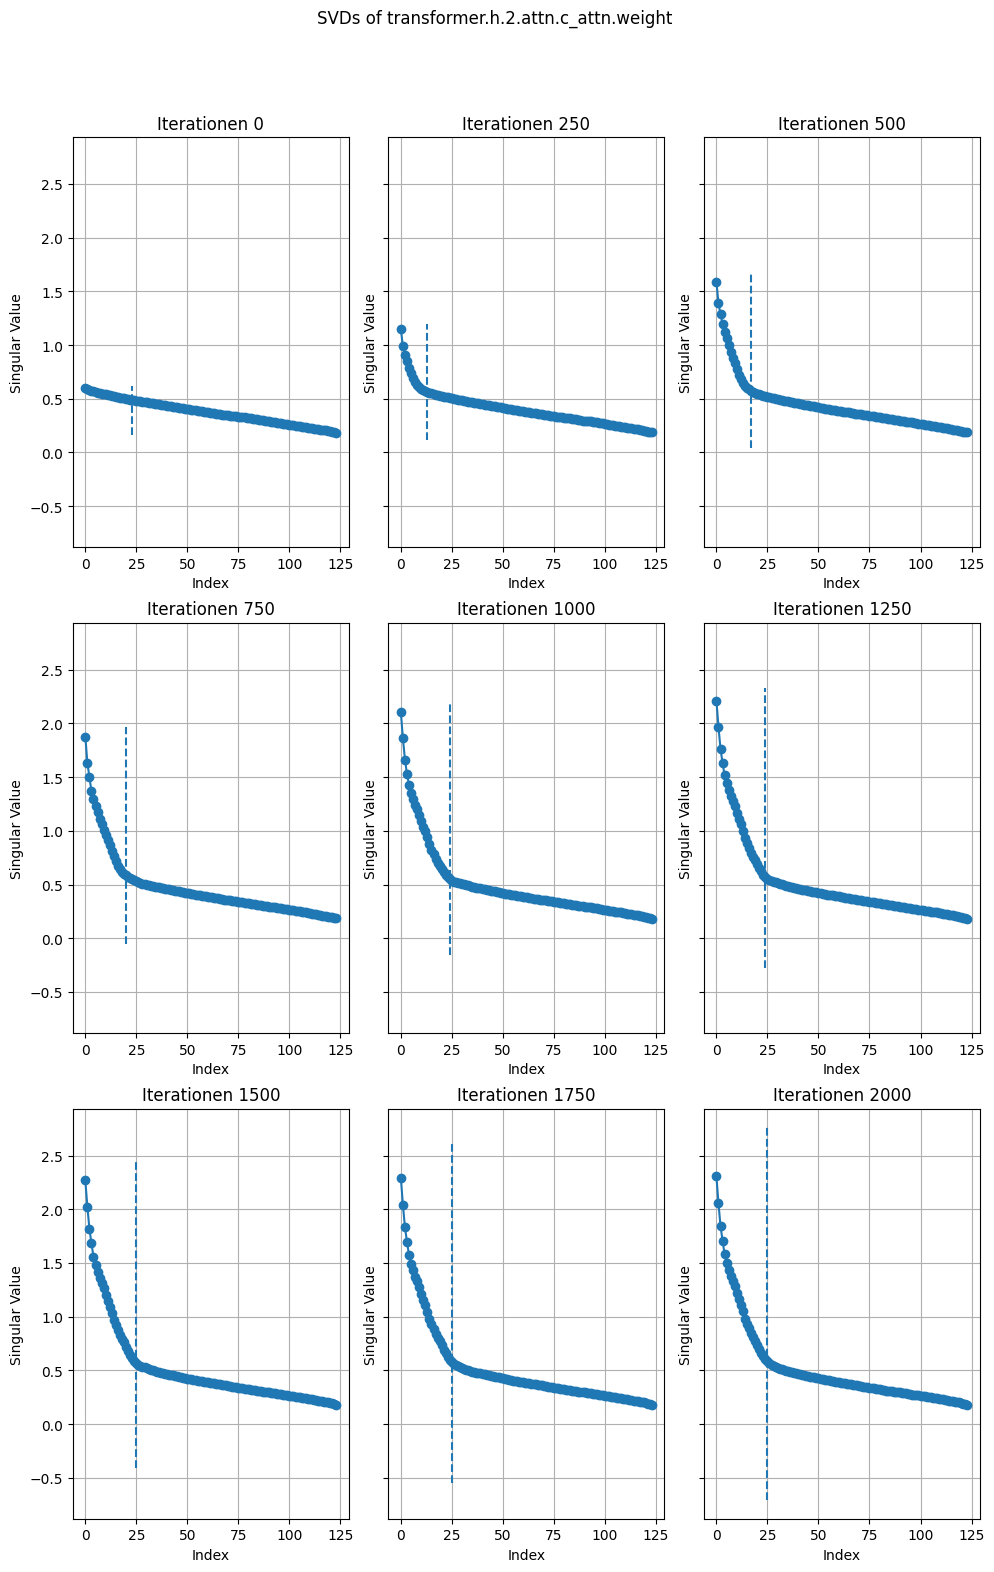

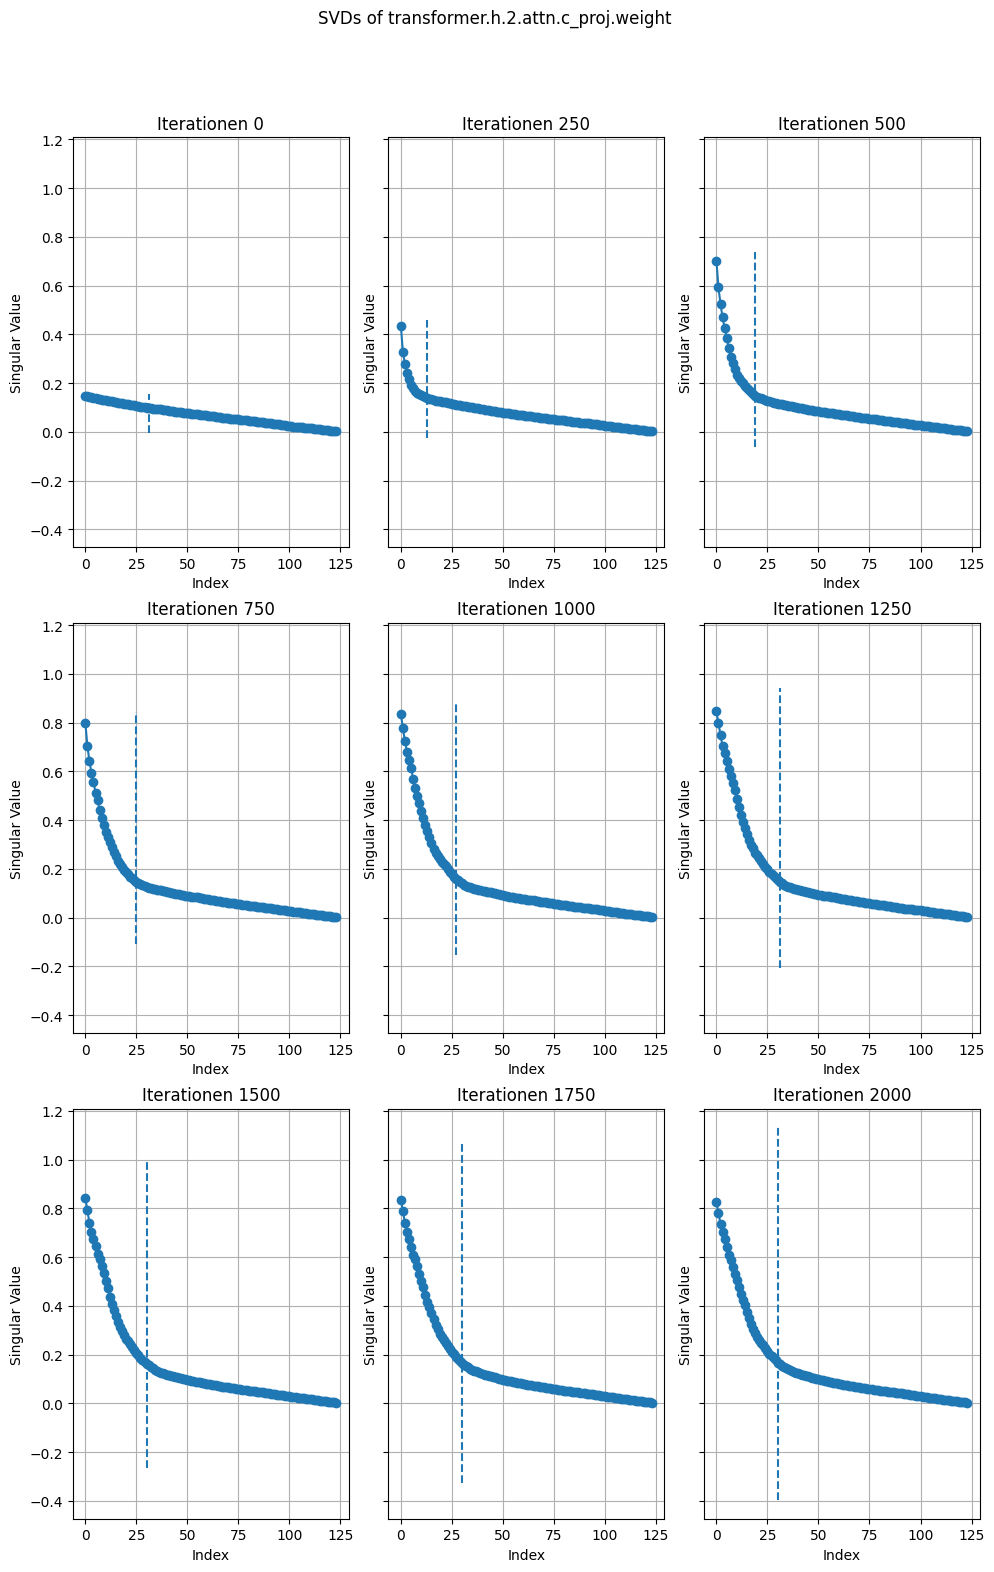

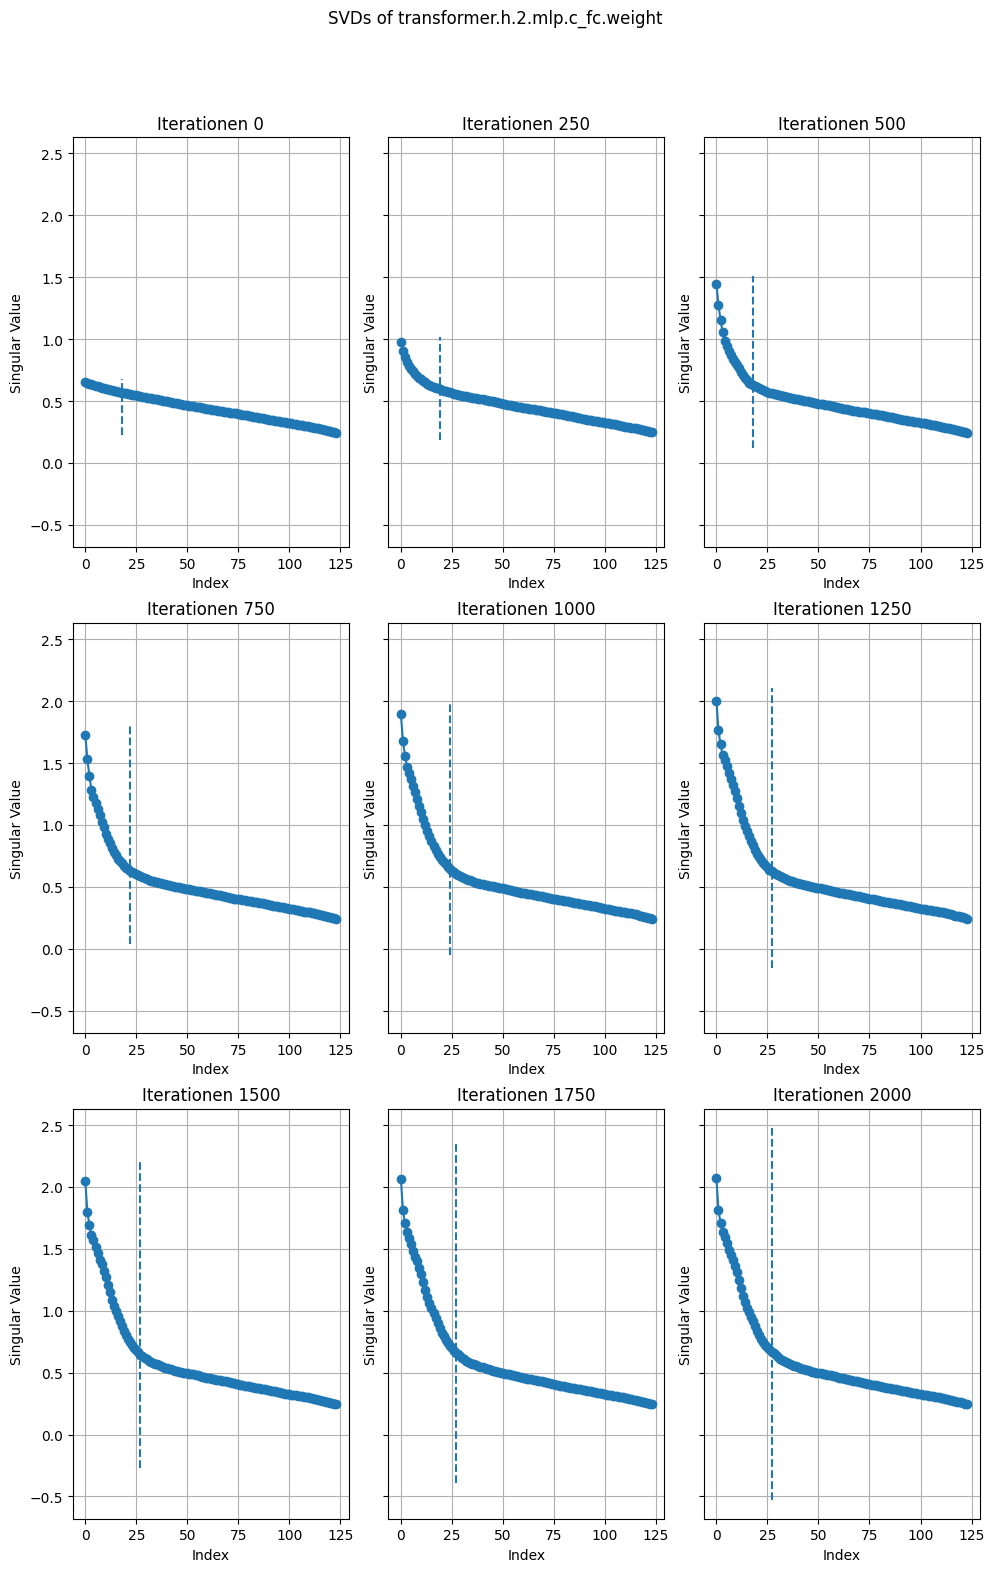

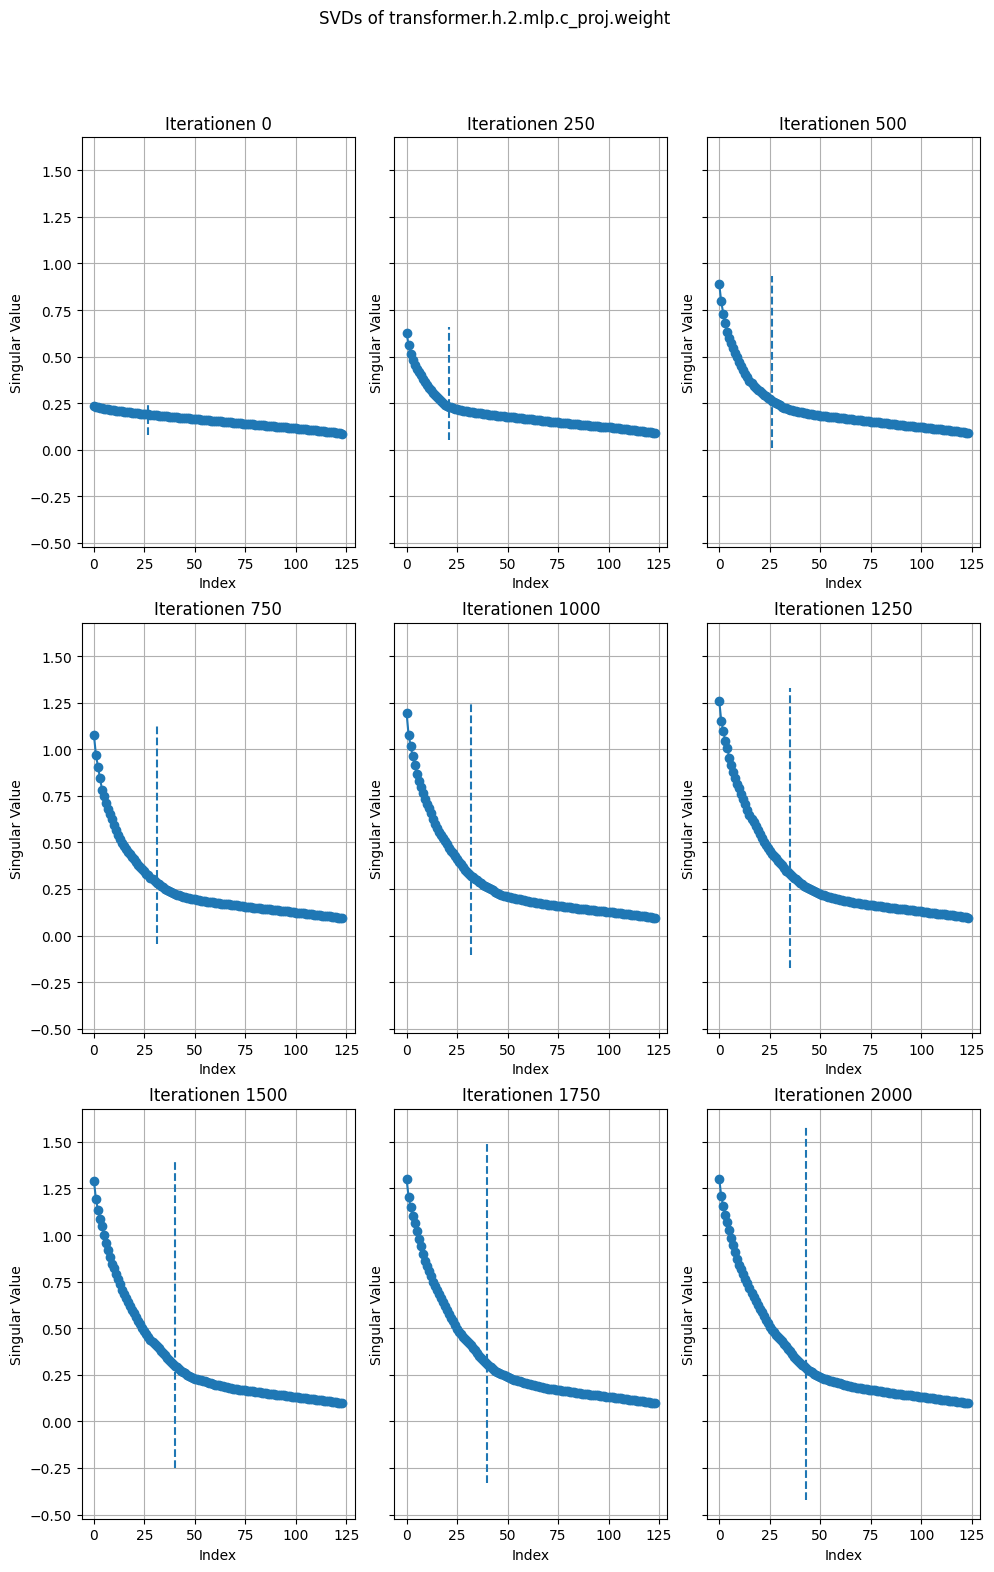

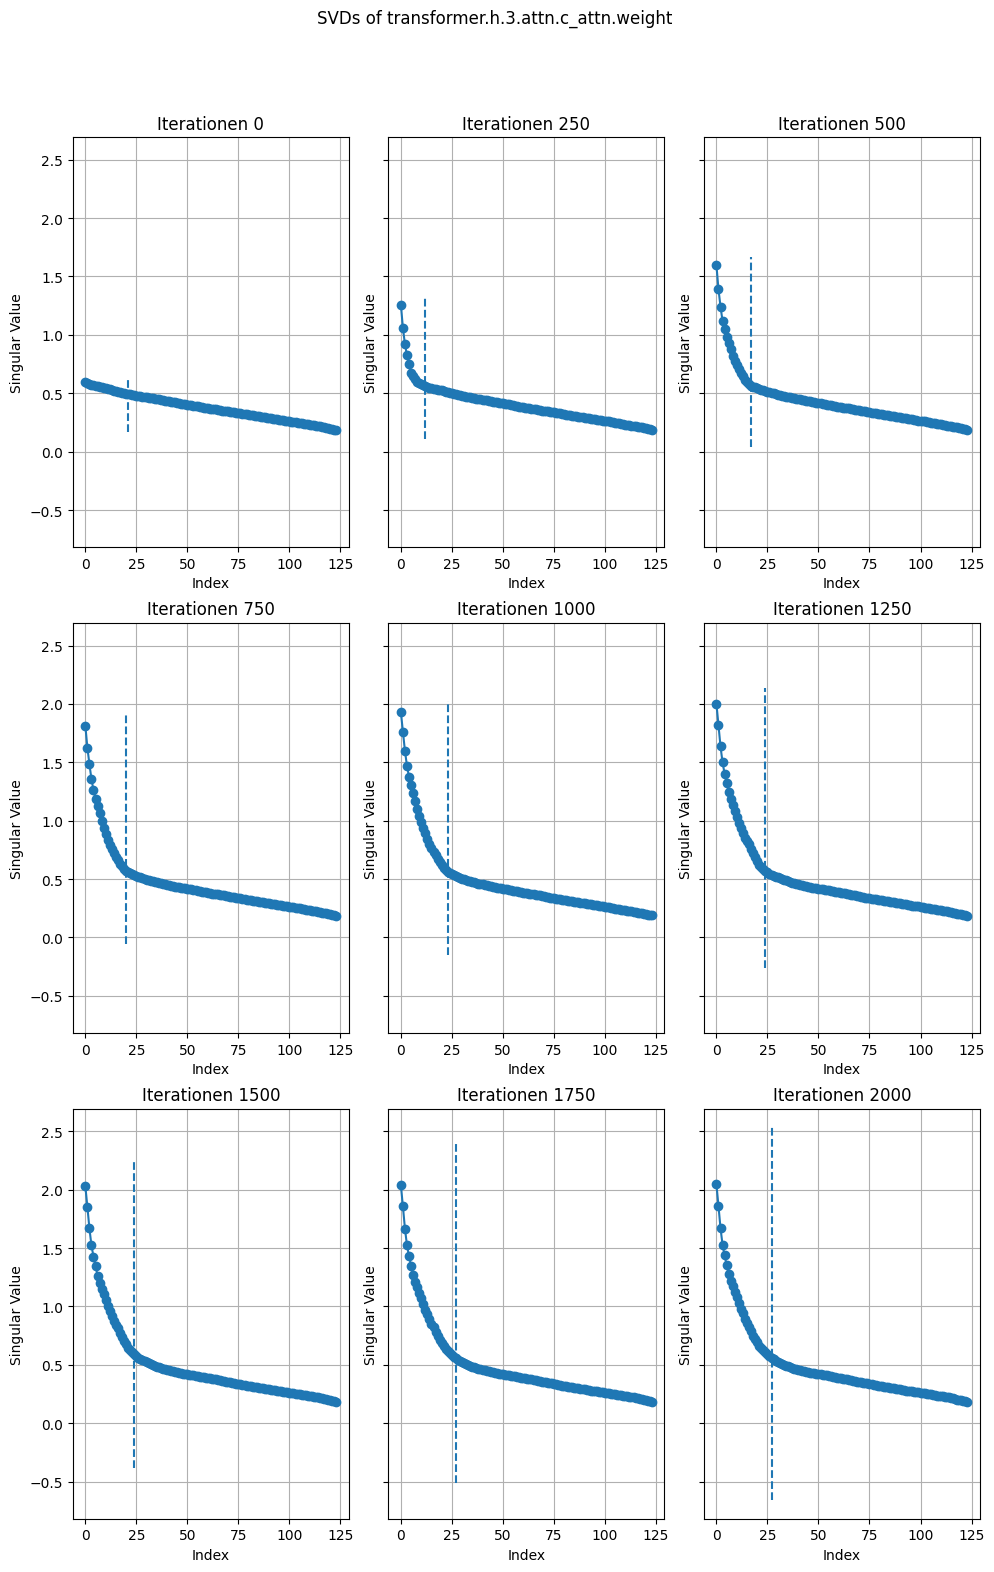

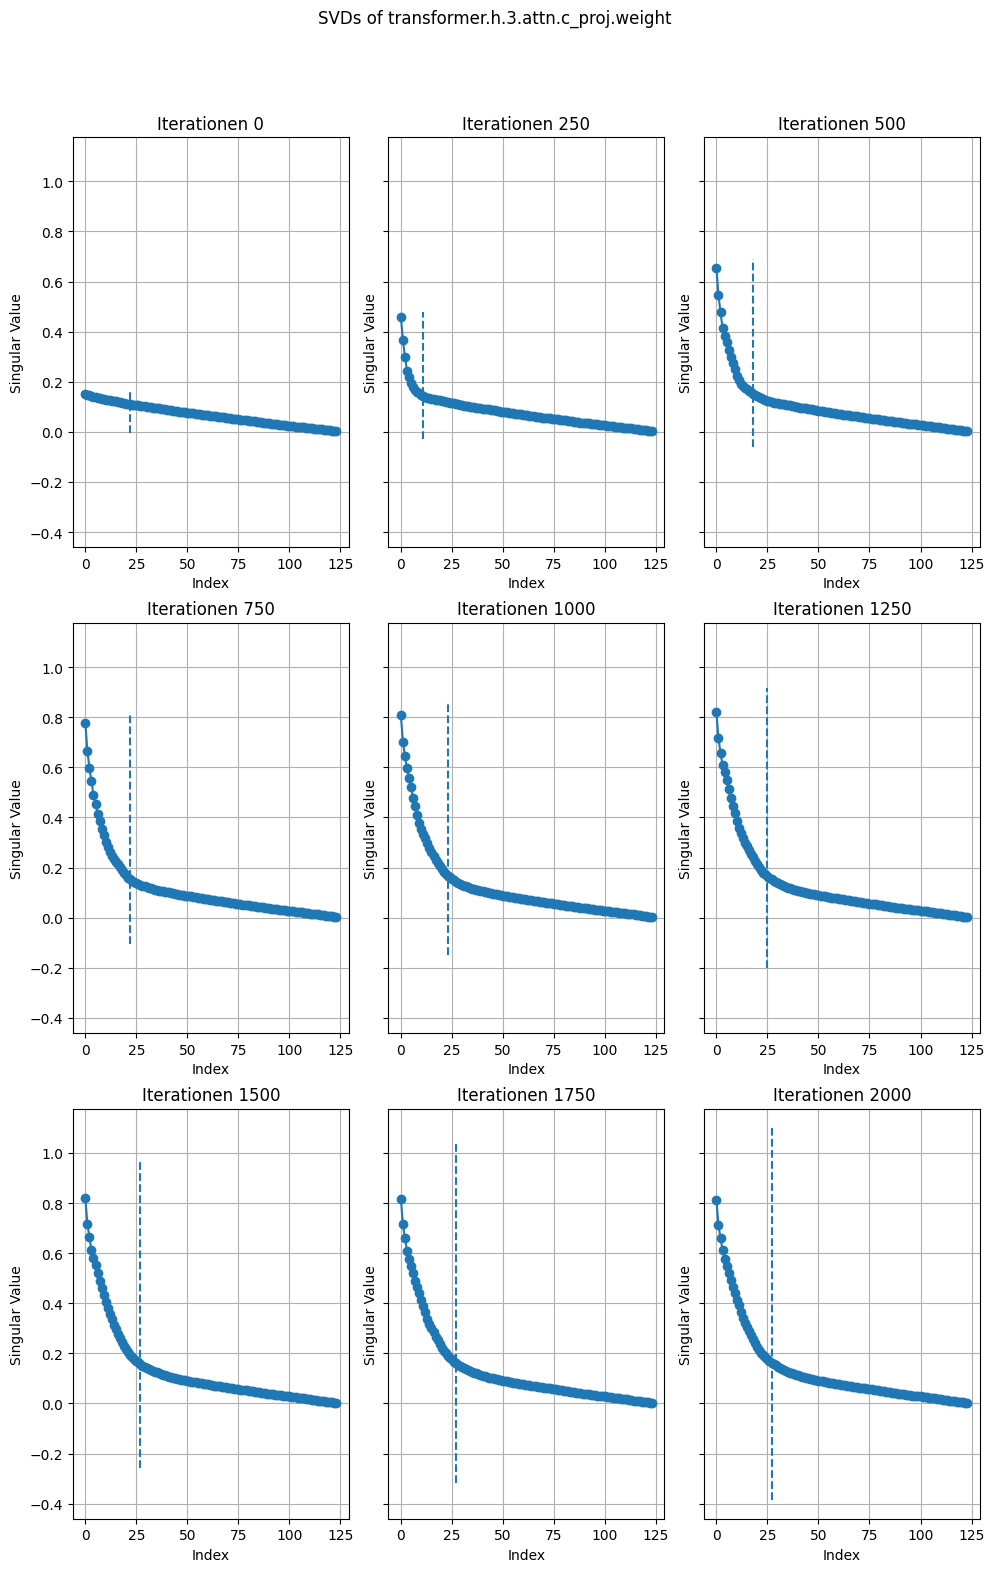

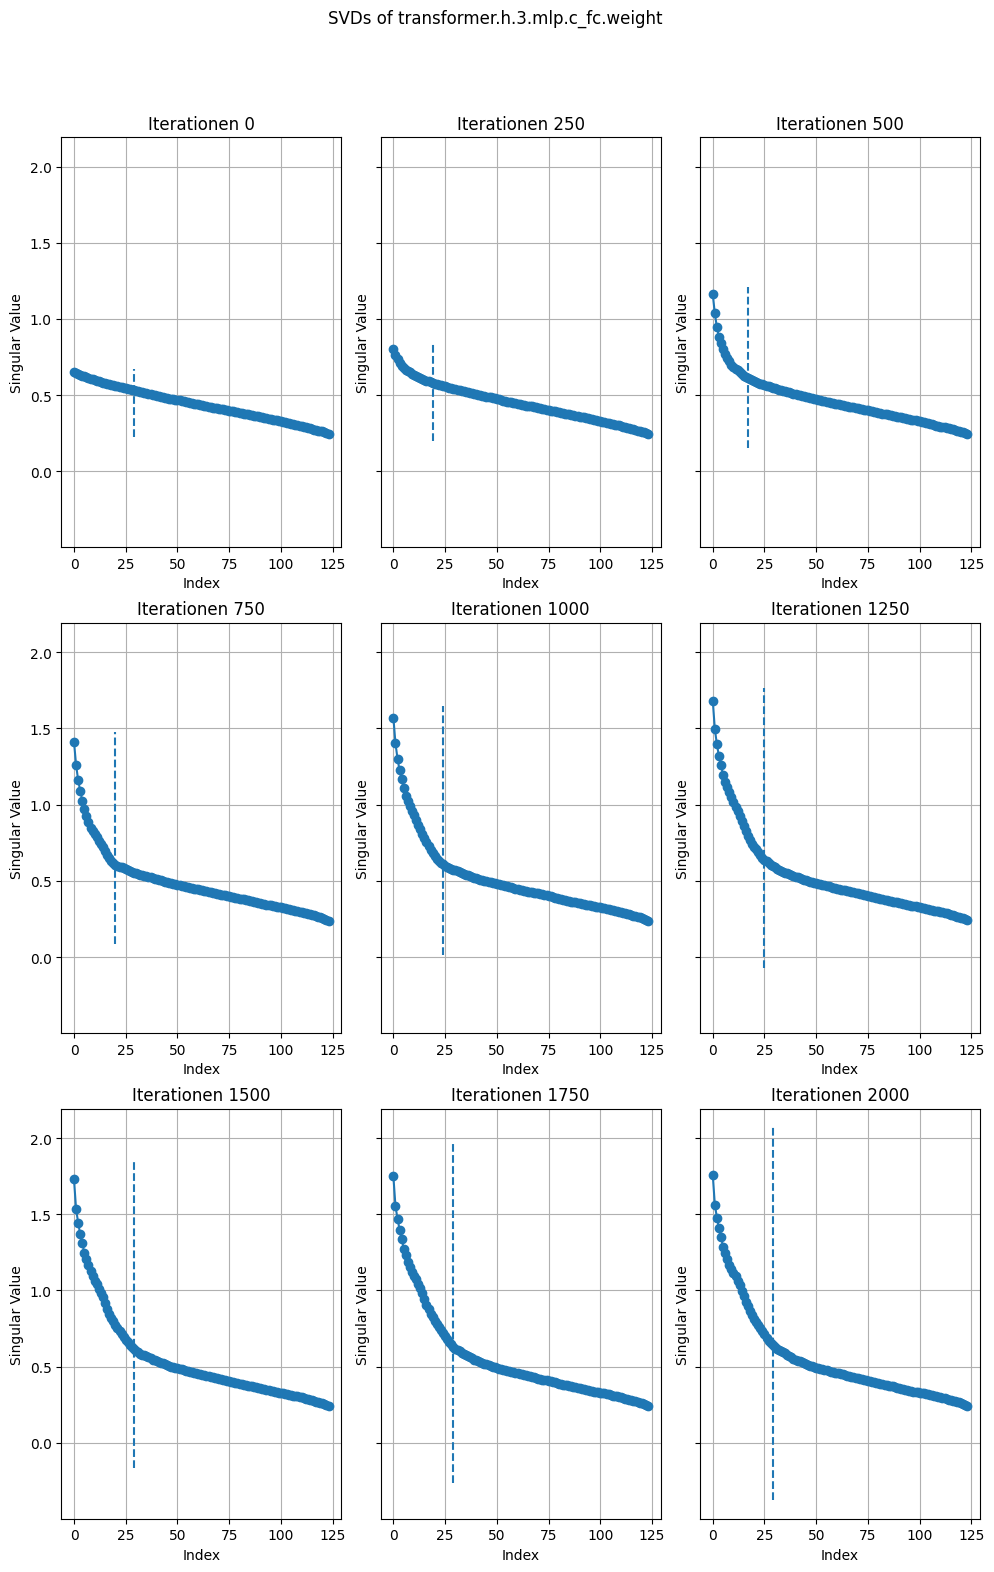

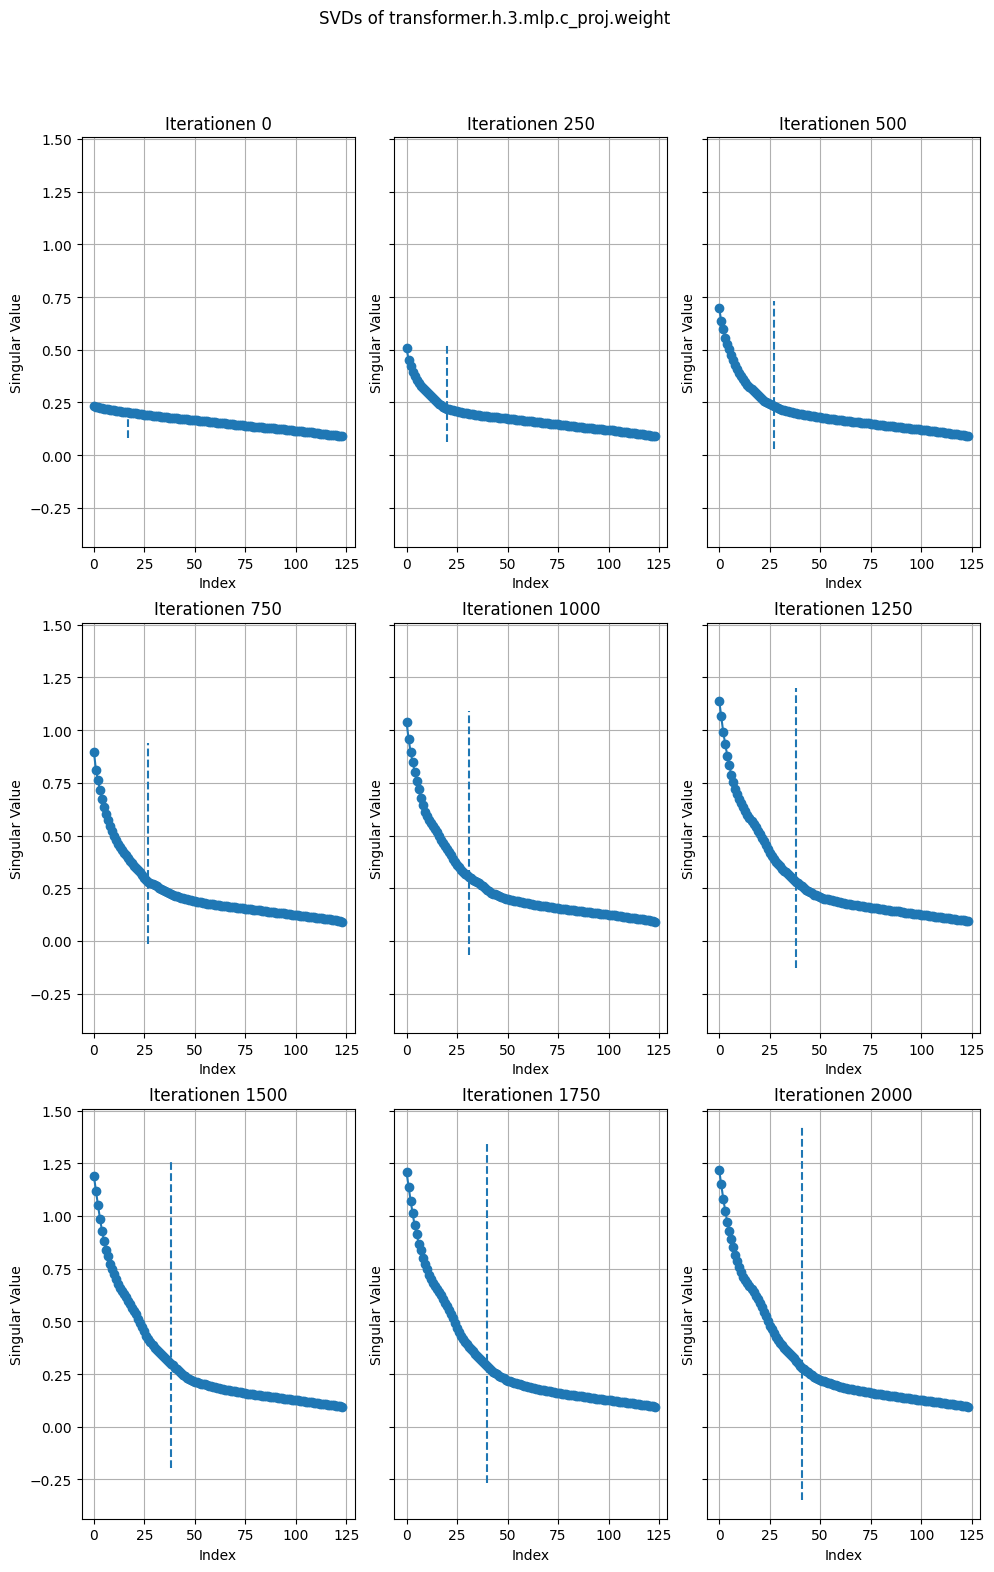

In [98]:
vec = ['transformer.h.0.ln_1.weight',
'transformer.h.0.ln_2.weight',
'transformer.h.1.ln_1.weight',
'transformer.h.1.ln_2.weight',
'transformer.h.2.ln_1.weight',
'transformer.h.2.ln_2.weight',
'transformer.h.3.ln_1.weight',
'transformer.h.3.ln_2.weight',
'transformer.ln_f.weight']
tables = ['transformer.wte.weight',
'transformer.wpe.weight',
'transformer.h.0.attn.c_attn.weight',
'transformer.h.0.attn.c_proj.weight',
'transformer.h.0.mlp.c_fc.weight',
'transformer.h.0.mlp.c_proj.weight',
'transformer.h.1.attn.c_attn.weight',
'transformer.h.1.attn.c_proj.weight',
'transformer.h.1.mlp.c_fc.weight',
'transformer.h.1.mlp.c_proj.weight',
'transformer.h.2.attn.c_attn.weight',
'transformer.h.2.attn.c_proj.weight',
'transformer.h.2.mlp.c_fc.weight',
'transformer.h.2.mlp.c_proj.weight',
'transformer.h.3.attn.c_attn.weight',
'transformer.h.3.attn.c_proj.weight',
'transformer.h.3.mlp.c_fc.weight',
'transformer.h.3.mlp.c_proj.weight',
]
for name in tables:
    print_svd(name, 9)

In [29]:
for name in tables:
    checkpoint = torch.load("./out-shakespeare-char/ckpt0.pt")
    vect = checkpoint['model'][name].cpu().numpy()
    print(name + ": " + str(vect.shape))

transformer.wte.weight: (65, 128)
transformer.wpe.weight: (64, 128)
transformer.h.0.attn.c_attn.weight: (384, 128)
transformer.h.0.attn.c_proj.weight: (128, 128)
transformer.h.0.mlp.c_fc.weight: (512, 128)
transformer.h.0.mlp.c_proj.weight: (128, 512)
transformer.h.1.attn.c_attn.weight: (384, 128)
transformer.h.1.attn.c_proj.weight: (128, 128)
transformer.h.1.mlp.c_fc.weight: (512, 128)
transformer.h.1.mlp.c_proj.weight: (128, 512)
transformer.h.2.attn.c_attn.weight: (384, 128)
transformer.h.2.attn.c_proj.weight: (128, 128)
transformer.h.2.mlp.c_fc.weight: (512, 128)
transformer.h.2.mlp.c_proj.weight: (128, 512)
transformer.h.3.attn.c_attn.weight: (384, 128)
transformer.h.3.attn.c_proj.weight: (128, 128)
transformer.h.3.mlp.c_fc.weight: (512, 128)
transformer.h.3.mlp.c_proj.weight: (128, 512)


In [32]:
pro_tables = [
'transformer.h.0.attn.c_proj.weight',
'transformer.h.1.attn.c_proj.weight',
'transformer.h.2.attn.c_proj.weight',
'transformer.h.3.attn.c_proj.weight'
]

In [34]:
chts = ['ckpt0.pt', 'ckpt250.pt','ckpt500.pt','ckpt750.pt','ckpt1000.pt','ckpt1250.pt','ckpt1500.pt','ckpt1750.pt','ckpt2000.pt']
checkpoint = torch.load("./out-shakespeare-char/" + chts[i])
matrix = checkpoint['model']['transformer.h.0.attn.c_proj.weight'].cpu().numpy()
eigenvalues, eigenvectors = np.linalg.eig(matrix)
eigenvalues

array([-0.2320536 +0.j        ,  0.18343571+0.03110716j,
        0.18343571-0.03110716j, -0.14175366+0.11810154j,
       -0.14175366-0.11810154j, -0.06214464+0.17061745j,
       -0.06214464-0.17061745j,  0.08331364+0.1488824j ,
        0.08331364-0.1488824j ,  0.12101865+0.11521982j,
        0.12101865-0.11521982j, -0.15782674+0.02992968j,
       -0.15782674-0.02992968j,  0.15008302+0.j        ,
       -0.09914371+0.10595412j, -0.09914371-0.10595412j,
        0.08717136+0.11453206j,  0.08717136-0.11453206j,
        0.14496793+0.j        ,  0.01312609+0.13745384j,
        0.01312609-0.13745384j, -0.01635089+0.13732831j,
       -0.01635089-0.13732831j,  0.04033978+0.12860157j,
        0.04033978-0.12860157j,  0.10768316+0.07168338j,
        0.10768316-0.07168338j,  0.11732177+0.03484518j,
        0.11732177-0.03484518j, -0.11679275+0.03935376j,
       -0.11679275-0.03935376j, -0.04687845+0.11148222j,
       -0.04687845-0.11148222j, -0.09634519+0.07291086j,
       -0.09634519-0.07291086j,

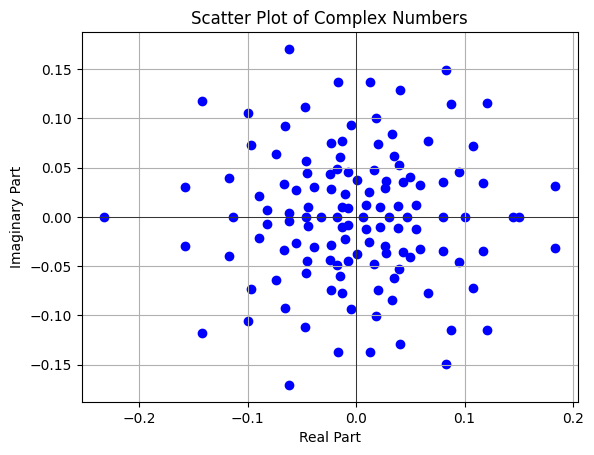

In [35]:
# Extract real and imaginary parts
real_parts = eigenvalues.real
imaginary_parts = eigenvalues.imag

# Create a scatter plot
plt.scatter(real_parts, imaginary_parts, color='blue')
plt.title('Scatter Plot of Complex Numbers')
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)  # Adds a horizontal line at y=0
plt.axvline(0, color='black', linewidth=0.5)  # Adds a vertical line at x=0
plt.show()

In [58]:
# Number of matrices and singular values
def print_eigen(matrixname, num):
    num_matrices = num

    # Create a figure and an array of subplots
    fig, axs = plt.subplots(3, 3, figsize=(10, 16), sharey=True)
    fig.suptitle("Eigenvalues of " + matrixname)
    
    x_ticks = np.arange(-0.2, 0.2, 0.1)
    y_ticks = np.arange(-0.2, 0.2, 0.1)

    # Loop through the subplots and plot line charts for different matrices
    for i in range(num_matrices):
        row = i // 3
        col = i % 3
        ax = axs[row, col]
        
        chts = ['ckpt0.pt', 'ckpt250.pt','ckpt500.pt','ckpt750.pt','ckpt1000.pt','ckpt1250.pt','ckpt1500.pt','ckpt1750.pt','ckpt2000.pt']
        checkpoint = torch.load("./out-shakespeare-char/" + chts[i])
        matrix = checkpoint['model'][matrixname].cpu().numpy()

        eigenvalues, _ = np.linalg.eig(matrix)

        real_parts = eigenvalues.real
        imaginary_parts = eigenvalues.imag

        # Create a scatter plot
        ax.scatter(real_parts, imaginary_parts, color='blue')
        ax.set_title(f"Iterationen {(i)*250}")
        
        ax.set_xlabel("Real Part")
        ax.set_ylabel("Singular Value")

        # Set the same ticks for all subplots
        ax.set_xticks(x_ticks)
        ax.set_yticks(y_ticks)
       
        #ax.hline(0, color='black', linewidth=0.5)  # Adds a horizontal line at y=0
        #ax.vline(0, color='black', linewidth=0.5)  # Adds a vertical line at x=0

    # Adjust layout and spacing
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)

    # Display the subplots
    plt.show()

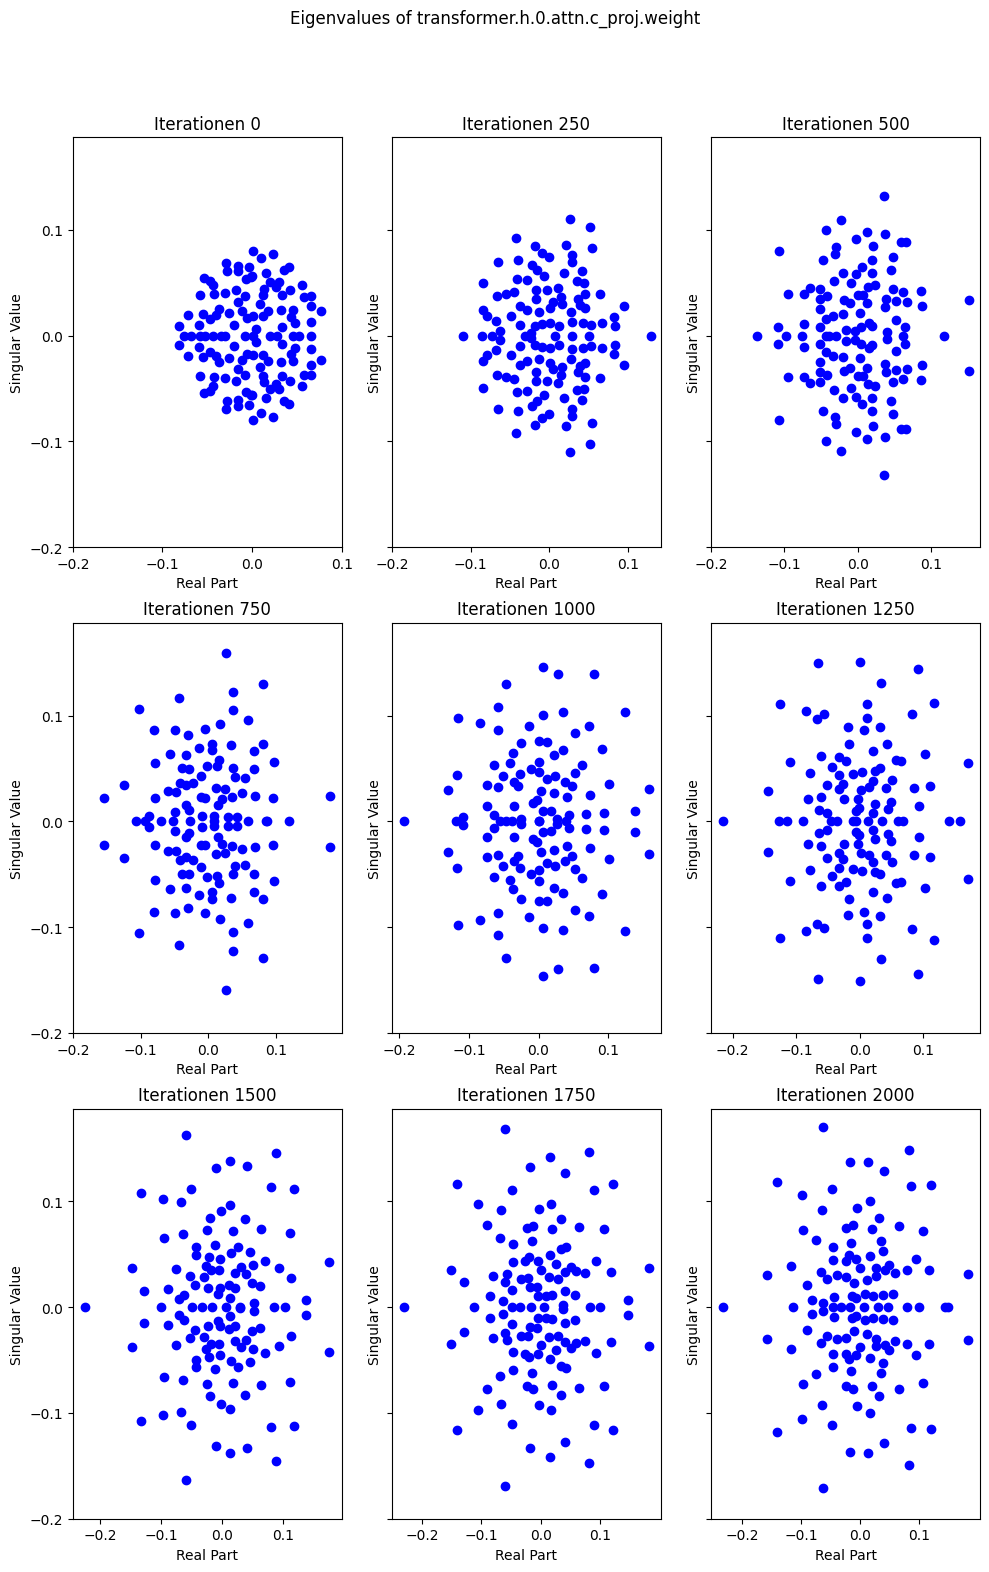

In [59]:
print_eigen('transformer.h.0.attn.c_proj.weight', 9)

/Users/astoeckl/Documents/nanoGPT/nanogpt/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Elbow point (optimal number of clusters): 4


/Users/astoeckl/Documents/nanoGPT/nanogpt/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/astoeckl/Documents/nanoGPT/nanogpt/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/astoeckl/Documents/nanoGPT/nanogpt/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/astoeckl/Documents/nanoGPT/nanogpt/lib/python3.11/site-packages/sklearn/cluster/_kme

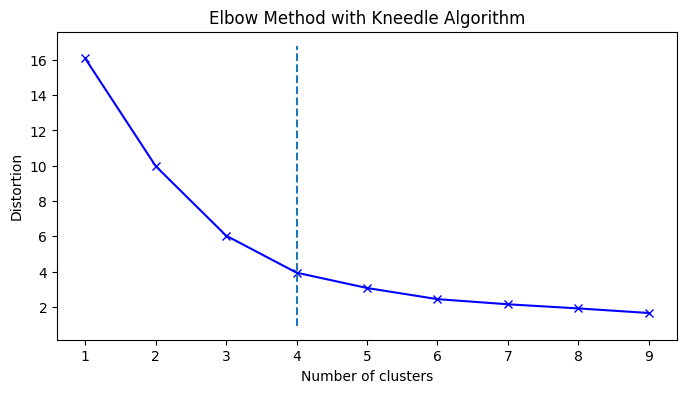

In [66]:
import numpy as np
from sklearn.cluster import KMeans
from kneed import KneeLocator
import matplotlib.pyplot as plt

# Generate some artificial data (for example purposes)
np.random.seed(0)
data = np.random.rand(100, 2)

# Calculate distortions for a range of number of clusters
distortions = []
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data)
    distortions.append(kmeanModel.inertia_)

# Use the Kneedle algorithm to find the elbow point
kneedle = KneeLocator(K, distortions, S=1.0, curve="convex", direction="decreasing")

# Knee point
print("Elbow point (optimal number of clusters):", kneedle.knee)

# Plotting
plt.figure(figsize=(8, 4))
plt.plot(K, distortions, 'bx-')
plt.vlines(kneedle.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method with Kneedle Algorithm')
plt.show()



In [ ]:
kneedle = KneeLocator(x, y, S=1.0, curve="concave", direction="increasing")

print(round(kneedle.knee, 3))
0.222

print(round(kneedle.elbow, 3))

12


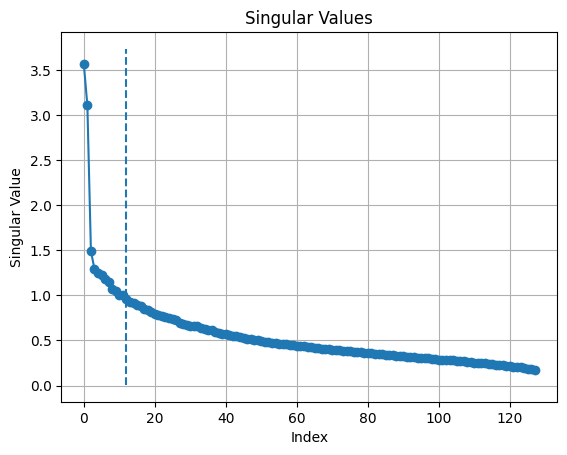

In [75]:
checkpoint = torch.load("./out-shakespeare-char/ckpt2000.pt")
numpy_array = checkpoint['model']['transformer.h.0.attn.c_attn.weight'].cpu().numpy()
u, s, vh = np.linalg.svd(numpy_array)

x = range(128)
y = s

kneedle = KneeLocator(x, y, S=1, curve="convex", direction="decreasing")
print(kneedle.knee)

plt.plot(s, marker='o', linestyle='-')
plt.title("Singular Values")
plt.xlabel("Index")
plt.ylabel("Singular Value")
plt.vlines(kneedle.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.grid(True)
plt.show()